### 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('./train_santander.csv', encoding='latin-1')
print('dataset shape : ', cust_df.shape)
cust_df.head(3) # target : 0 만족, 1 불만족

dataset shape :  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[ cust_df['TARGET'] == 1 ]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print('unsatisfied 비율은 {0:.2f}'.format(( unsatisfied_cnt / total_cnt )))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
print(cust_df['var3'].value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [6]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-99999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리, 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]

print('피처 데이터 shape : ', format(X_features.shape))

피처 데이터 shape :  (76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0, stratify=y_labels)

train_cnt = y_train.count()
test_cnt = y_test.count()

print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960438
1    0.039562
Name: TARGET, dtype: float64
테스트 세트 레이블 값 분포 비율
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')

print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82569	validation_1-auc:0.79270
[1]	validation_0-auc:0.84019	validation_1-auc:0.80728
[2]	validation_0-auc:0.84369	validation_1-auc:0.81015
[3]	validation_0-auc:0.84771	validation_1-auc:0.81284
[4]	validation_0-auc:0.85116	validation_1-auc:0.81467
[5]	validation_0-auc:0.85511	validation_1-auc:0.81857
[6]	validation_0-auc:0.85922	validation_1-auc:0.81974
[7]	validation_0-auc:0.86238	validation_1-auc:0.82030
[8]	validation_0-auc:0.86570	validation_1-auc:0.82144
[9]	validation_0-auc:0.86798	validation_1-auc:0.82300
[10]	validation_0-auc:0.87105	validation_1-auc:0.82377
[11]	validation_0-auc:0.87448	validation_1-auc:0.82454
[12]	validation_0-auc:0.87688	validation_1-auc:0.82400
[13]	validation_0-auc:0.87921	validation_1-auc:0.82466
[14]	validation_0-auc:0.88085	validation_1-auc:0.82534
[15]	validation_0-auc:0.88335	validation_1-auc:0.82412
[16]	validation_0-auc:0.88575	validation_1-auc:0.82479
[17]	validation_0-auc:0.88665	validation_1-auc:0.82506
[18]	validation_0-au

In [9]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {
    'max_depth' : [5, 7],
    'min_child_weight' : [1, 3],
    'colsample_bytree' : [0.5, 0.75]
}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv를 지정하지 않음.
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터 : ', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro' )

print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81196	validation_1-auc:0.78311
[1]	validation_0-auc:0.82815	validation_1-auc:0.79759
[2]	validation_0-auc:0.83364	validation_1-auc:0.80231
[3]	validation_0-auc:0.83628	validation_1-auc:0.80267
[4]	validation_0-auc:0.83979	validation_1-auc:0.80647
[5]	validation_0-auc:0.84405	validation_1-auc:0.80978
[6]	validation_0-auc:0.84408	validation_1-auc:0.81103
[7]	validation_0-auc:0.85033	validation_1-auc:0.81607
[8]	validation_0-auc:0.85357	validation_1-auc:0.81771
[9]	validation_0-auc:0.85404	validation_1-auc:0.81508
[10]	validation_0-auc:0.85333	validation_1-auc:0.80812
[11]	validation_0-auc:0.85347	validation_1-auc:0.80705
[12]	validation_0-auc:0.85882	validation_1-auc:0.81215
[13]	validation_0-auc:0.86287	validation_1-auc:0.81618
[14]	validation_0-auc:0.86477	validation_1-auc:0.81885
[15]	validation_0-auc:0.86623	validation_1-auc:0.81808
[16]	validation_0-auc:0.86791	validation_1-auc:0.81950
[17]	validation_0-auc:0.86934	validation_1-auc:0.82026
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80413	validation_1-auc:0.77478
[1]	validation_0-auc:0.82443	validation_1-auc:0.79170
[2]	validation_0-auc:0.83344	validation_1-auc:0.80294
[3]	validation_0-auc:0.83715	validation_1-auc:0.80612
[4]	validation_0-auc:0.84016	validation_1-auc:0.80942
[5]	validation_0-auc:0.84294	validation_1-auc:0.80869
[6]	validation_0-auc:0.84259	validation_1-auc:0.80731
[7]	validation_0-auc:0.84824	validation_1-auc:0.81229
[8]	validation_0-auc:0.85239	validation_1-auc:0.81684
[9]	validation_0-auc:0.85437	validation_1-auc:0.81316
[10]	validation_0-auc:0.85412	validation_1-auc:0.80958
[11]	validation_0-auc:0.85495	validation_1-auc:0.80690
[12]	validation_0-auc:0.85997	validation_1-auc:0.81257
[13]	validation_0-auc:0.86348	validation_1-auc:0.81494
[14]	validation_0-auc:0.86522	validation_1-auc:0.81739
[15]	validation_0-auc:0.86680	validation_1-auc:0.81599
[16]	validation_0-auc:0.86784	validation_1-auc:0.81801
[17]	validation_0-auc:0.86972	validation_1-auc:0.81903
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80538	validation_1-auc:0.77744
[1]	validation_0-auc:0.82513	validation_1-auc:0.79336
[2]	validation_0-auc:0.83523	validation_1-auc:0.80539
[3]	validation_0-auc:0.83633	validation_1-auc:0.80589
[4]	validation_0-auc:0.83990	validation_1-auc:0.80931
[5]	validation_0-auc:0.84383	validation_1-auc:0.80933
[6]	validation_0-auc:0.84384	validation_1-auc:0.80945
[7]	validation_0-auc:0.85141	validation_1-auc:0.81511
[8]	validation_0-auc:0.85464	validation_1-auc:0.81980
[9]	validation_0-auc:0.85500	validation_1-auc:0.81631
[10]	validation_0-auc:0.85399	validation_1-auc:0.81148
[11]	validation_0-auc:0.85424	validation_1-auc:0.80961
[12]	validation_0-auc:0.85944	validation_1-auc:0.81598
[13]	validation_0-auc:0.86318	validation_1-auc:0.82036
[14]	validation_0-auc:0.86431	validation_1-auc:0.82078
[15]	validation_0-auc:0.86541	validation_1-auc:0.82000
[16]	validation_0-auc:0.86688	validation_1-auc:0.82194
[17]	validation_0-auc:0.86894	validation_1-auc:0.82250
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81438	validation_1-auc:0.78815
[1]	validation_0-auc:0.83069	validation_1-auc:0.80081
[2]	validation_0-auc:0.83551	validation_1-auc:0.80440
[3]	validation_0-auc:0.83982	validation_1-auc:0.80669
[4]	validation_0-auc:0.84157	validation_1-auc:0.80774
[5]	validation_0-auc:0.84461	validation_1-auc:0.80953
[6]	validation_0-auc:0.84533	validation_1-auc:0.80685
[7]	validation_0-auc:0.84996	validation_1-auc:0.81171
[8]	validation_0-auc:0.85305	validation_1-auc:0.81596
[9]	validation_0-auc:0.85237	validation_1-auc:0.81168
[10]	validation_0-auc:0.85213	validation_1-auc:0.80620
[11]	validation_0-auc:0.85245	validation_1-auc:0.80542
[12]	validation_0-auc:0.85779	validation_1-auc:0.81092
[13]	validation_0-auc:0.86186	validation_1-auc:0.81475
[14]	validation_0-auc:0.86379	validation_1-auc:0.81748
[15]	validation_0-auc:0.86523	validation_1-auc:0.81738
[16]	validation_0-auc:0.86646	validation_1-auc:0.81966
[17]	validation_0-auc:0.86821	validation_1-auc:0.82076
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81069	validation_1-auc:0.78599
[1]	validation_0-auc:0.83132	validation_1-auc:0.80272
[2]	validation_0-auc:0.83632	validation_1-auc:0.81009
[3]	validation_0-auc:0.83694	validation_1-auc:0.80785
[4]	validation_0-auc:0.84213	validation_1-auc:0.81207
[5]	validation_0-auc:0.84361	validation_1-auc:0.80922
[6]	validation_0-auc:0.84408	validation_1-auc:0.80712
[7]	validation_0-auc:0.85097	validation_1-auc:0.81336
[8]	validation_0-auc:0.85384	validation_1-auc:0.81675
[9]	validation_0-auc:0.85358	validation_1-auc:0.81322
[10]	validation_0-auc:0.85337	validation_1-auc:0.81003
[11]	validation_0-auc:0.85337	validation_1-auc:0.80910
[12]	validation_0-auc:0.85833	validation_1-auc:0.81418
[13]	validation_0-auc:0.86149	validation_1-auc:0.81935
[14]	validation_0-auc:0.86341	validation_1-auc:0.82036
[15]	validation_0-auc:0.86453	validation_1-auc:0.81874
[16]	validation_0-auc:0.86566	validation_1-auc:0.82121
[17]	validation_0-auc:0.86745	validation_1-auc:0.82276
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81093	validation_1-auc:0.78344
[1]	validation_0-auc:0.82761	validation_1-auc:0.79942
[2]	validation_0-auc:0.83469	validation_1-auc:0.80406
[3]	validation_0-auc:0.83710	validation_1-auc:0.80770
[4]	validation_0-auc:0.84186	validation_1-auc:0.81303
[5]	validation_0-auc:0.84434	validation_1-auc:0.81215
[6]	validation_0-auc:0.84295	validation_1-auc:0.81177
[7]	validation_0-auc:0.84888	validation_1-auc:0.81587
[8]	validation_0-auc:0.85170	validation_1-auc:0.81872
[9]	validation_0-auc:0.85170	validation_1-auc:0.81536
[10]	validation_0-auc:0.85086	validation_1-auc:0.81243
[11]	validation_0-auc:0.85066	validation_1-auc:0.81011
[12]	validation_0-auc:0.85561	validation_1-auc:0.81449
[13]	validation_0-auc:0.85998	validation_1-auc:0.81874
[14]	validation_0-auc:0.86138	validation_1-auc:0.82012
[15]	validation_0-auc:0.86281	validation_1-auc:0.81982
[16]	validation_0-auc:0.86406	validation_1-auc:0.82235
[17]	validation_0-auc:0.86525	validation_1-auc:0.82258
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80412	validation_1-auc:0.77157
[1]	validation_0-auc:0.82371	validation_1-auc:0.79192
[2]	validation_0-auc:0.83260	validation_1-auc:0.80363
[3]	validation_0-auc:0.83809	validation_1-auc:0.80815
[4]	validation_0-auc:0.84217	validation_1-auc:0.81438
[5]	validation_0-auc:0.84284	validation_1-auc:0.80967
[6]	validation_0-auc:0.84130	validation_1-auc:0.80700
[7]	validation_0-auc:0.84717	validation_1-auc:0.81253
[8]	validation_0-auc:0.85223	validation_1-auc:0.81643
[9]	validation_0-auc:0.85361	validation_1-auc:0.81283
[10]	validation_0-auc:0.85392	validation_1-auc:0.81040
[11]	validation_0-auc:0.85369	validation_1-auc:0.80912
[12]	validation_0-auc:0.85815	validation_1-auc:0.81441
[13]	validation_0-auc:0.86145	validation_1-auc:0.81707
[14]	validation_0-auc:0.86336	validation_1-auc:0.81917
[15]	validation_0-auc:0.86493	validation_1-auc:0.81920
[16]	validation_0-auc:0.86589	validation_1-auc:0.82037
[17]	validation_0-auc:0.86740	validation_1-auc:0.82050
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80648	validation_1-auc:0.77981
[1]	validation_0-auc:0.82462	validation_1-auc:0.79283
[2]	validation_0-auc:0.83492	validation_1-auc:0.80556
[3]	validation_0-auc:0.83593	validation_1-auc:0.80577
[4]	validation_0-auc:0.83794	validation_1-auc:0.80770
[5]	validation_0-auc:0.84289	validation_1-auc:0.80848
[6]	validation_0-auc:0.84285	validation_1-auc:0.80640
[7]	validation_0-auc:0.84985	validation_1-auc:0.81215
[8]	validation_0-auc:0.85331	validation_1-auc:0.81564
[9]	validation_0-auc:0.85353	validation_1-auc:0.81253
[10]	validation_0-auc:0.85231	validation_1-auc:0.80888
[11]	validation_0-auc:0.85255	validation_1-auc:0.80739
[12]	validation_0-auc:0.85737	validation_1-auc:0.81491
[13]	validation_0-auc:0.86133	validation_1-auc:0.81867
[14]	validation_0-auc:0.86281	validation_1-auc:0.82116
[15]	validation_0-auc:0.86427	validation_1-auc:0.81971
[16]	validation_0-auc:0.86603	validation_1-auc:0.82106
[17]	validation_0-auc:0.86734	validation_1-auc:0.82180
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81378	validation_1-auc:0.78841
[1]	validation_0-auc:0.83066	validation_1-auc:0.80140
[2]	validation_0-auc:0.83639	validation_1-auc:0.80502
[3]	validation_0-auc:0.83971	validation_1-auc:0.80698
[4]	validation_0-auc:0.84168	validation_1-auc:0.81087
[5]	validation_0-auc:0.84476	validation_1-auc:0.81000
[6]	validation_0-auc:0.84547	validation_1-auc:0.80695
[7]	validation_0-auc:0.84961	validation_1-auc:0.81206
[8]	validation_0-auc:0.85208	validation_1-auc:0.81562
[9]	validation_0-auc:0.85292	validation_1-auc:0.81384
[10]	validation_0-auc:0.85175	validation_1-auc:0.80998
[11]	validation_0-auc:0.85217	validation_1-auc:0.80815
[12]	validation_0-auc:0.85657	validation_1-auc:0.81357
[13]	validation_0-auc:0.86029	validation_1-auc:0.81716
[14]	validation_0-auc:0.86223	validation_1-auc:0.81981
[15]	validation_0-auc:0.86383	validation_1-auc:0.81816
[16]	validation_0-auc:0.86545	validation_1-auc:0.81967
[17]	validation_0-auc:0.86728	validation_1-auc:0.82048
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81166	validation_1-auc:0.78827
[1]	validation_0-auc:0.83074	validation_1-auc:0.80555
[2]	validation_0-auc:0.83694	validation_1-auc:0.81166
[3]	validation_0-auc:0.83904	validation_1-auc:0.81318
[4]	validation_0-auc:0.84183	validation_1-auc:0.81557
[5]	validation_0-auc:0.84369	validation_1-auc:0.81187
[6]	validation_0-auc:0.84358	validation_1-auc:0.81032
[7]	validation_0-auc:0.84970	validation_1-auc:0.81444
[8]	validation_0-auc:0.85267	validation_1-auc:0.81740
[9]	validation_0-auc:0.85294	validation_1-auc:0.81356
[10]	validation_0-auc:0.85262	validation_1-auc:0.81051
[11]	validation_0-auc:0.85272	validation_1-auc:0.80956
[12]	validation_0-auc:0.85769	validation_1-auc:0.81617
[13]	validation_0-auc:0.86096	validation_1-auc:0.82062
[14]	validation_0-auc:0.86238	validation_1-auc:0.82284
[15]	validation_0-auc:0.86331	validation_1-auc:0.82128
[16]	validation_0-auc:0.86448	validation_1-auc:0.82277
[17]	validation_0-auc:0.86638	validation_1-auc:0.82447
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82383	validation_1-auc:0.79007
[1]	validation_0-auc:0.83585	validation_1-auc:0.79909
[2]	validation_0-auc:0.84232	validation_1-auc:0.80374
[3]	validation_0-auc:0.84606	validation_1-auc:0.80722
[4]	validation_0-auc:0.84947	validation_1-auc:0.81015
[5]	validation_0-auc:0.85501	validation_1-auc:0.81079
[6]	validation_0-auc:0.85611	validation_1-auc:0.80893
[7]	validation_0-auc:0.86450	validation_1-auc:0.81530
[8]	validation_0-auc:0.86905	validation_1-auc:0.81803
[9]	validation_0-auc:0.86943	validation_1-auc:0.81370
[10]	validation_0-auc:0.86956	validation_1-auc:0.80884
[11]	validation_0-auc:0.86997	validation_1-auc:0.80595
[12]	validation_0-auc:0.87566	validation_1-auc:0.81024
[13]	validation_0-auc:0.88238	validation_1-auc:0.81484
[14]	validation_0-auc:0.88480	validation_1-auc:0.81593
[15]	validation_0-auc:0.88663	validation_1-auc:0.81732
[16]	validation_0-auc:0.88844	validation_1-auc:0.81933
[17]	validation_0-auc:0.89114	validation_1-auc:0.82112
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82252	validation_1-auc:0.78949
[1]	validation_0-auc:0.83720	validation_1-auc:0.80190
[2]	validation_0-auc:0.84182	validation_1-auc:0.80430
[3]	validation_0-auc:0.84681	validation_1-auc:0.80973
[4]	validation_0-auc:0.85356	validation_1-auc:0.81511
[5]	validation_0-auc:0.85553	validation_1-auc:0.81243
[6]	validation_0-auc:0.85850	validation_1-auc:0.81025
[7]	validation_0-auc:0.86628	validation_1-auc:0.81409
[8]	validation_0-auc:0.87157	validation_1-auc:0.81752
[9]	validation_0-auc:0.87265	validation_1-auc:0.81505
[10]	validation_0-auc:0.87360	validation_1-auc:0.81092
[11]	validation_0-auc:0.87446	validation_1-auc:0.80611
[12]	validation_0-auc:0.87905	validation_1-auc:0.81116
[13]	validation_0-auc:0.88265	validation_1-auc:0.81430
[14]	validation_0-auc:0.88528	validation_1-auc:0.81591
[15]	validation_0-auc:0.88695	validation_1-auc:0.81561
[16]	validation_0-auc:0.89000	validation_1-auc:0.81773
[17]	validation_0-auc:0.89194	validation_1-auc:0.81877
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81985	validation_1-auc:0.78915
[1]	validation_0-auc:0.83887	validation_1-auc:0.80596
[2]	validation_0-auc:0.84440	validation_1-auc:0.80938
[3]	validation_0-auc:0.84727	validation_1-auc:0.81247
[4]	validation_0-auc:0.85242	validation_1-auc:0.81586
[5]	validation_0-auc:0.85480	validation_1-auc:0.81287
[6]	validation_0-auc:0.85477	validation_1-auc:0.80931
[7]	validation_0-auc:0.86518	validation_1-auc:0.81660
[8]	validation_0-auc:0.87036	validation_1-auc:0.82071
[9]	validation_0-auc:0.87243	validation_1-auc:0.81580
[10]	validation_0-auc:0.87235	validation_1-auc:0.81170
[11]	validation_0-auc:0.87359	validation_1-auc:0.81057
[12]	validation_0-auc:0.88027	validation_1-auc:0.81649
[13]	validation_0-auc:0.88524	validation_1-auc:0.82029
[14]	validation_0-auc:0.88654	validation_1-auc:0.82143
[15]	validation_0-auc:0.88798	validation_1-auc:0.82066
[16]	validation_0-auc:0.89032	validation_1-auc:0.82257
[17]	validation_0-auc:0.89249	validation_1-auc:0.82193
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82160	validation_1-auc:0.79136
[1]	validation_0-auc:0.83743	validation_1-auc:0.80204
[2]	validation_0-auc:0.84643	validation_1-auc:0.80794
[3]	validation_0-auc:0.84918	validation_1-auc:0.80939
[4]	validation_0-auc:0.85476	validation_1-auc:0.81427
[5]	validation_0-auc:0.85710	validation_1-auc:0.81114
[6]	validation_0-auc:0.85955	validation_1-auc:0.80848
[7]	validation_0-auc:0.86501	validation_1-auc:0.81330
[8]	validation_0-auc:0.86871	validation_1-auc:0.81845
[9]	validation_0-auc:0.87119	validation_1-auc:0.81415
[10]	validation_0-auc:0.87328	validation_1-auc:0.80755
[11]	validation_0-auc:0.87400	validation_1-auc:0.80458
[12]	validation_0-auc:0.87957	validation_1-auc:0.81233
[13]	validation_0-auc:0.88420	validation_1-auc:0.81554
[14]	validation_0-auc:0.88614	validation_1-auc:0.81742
[15]	validation_0-auc:0.88742	validation_1-auc:0.81733
[16]	validation_0-auc:0.88910	validation_1-auc:0.81886
[17]	validation_0-auc:0.89074	validation_1-auc:0.82129
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81680	validation_1-auc:0.78712
[1]	validation_0-auc:0.83705	validation_1-auc:0.80245
[2]	validation_0-auc:0.84275	validation_1-auc:0.80798
[3]	validation_0-auc:0.84770	validation_1-auc:0.81179
[4]	validation_0-auc:0.85475	validation_1-auc:0.81405
[5]	validation_0-auc:0.85661	validation_1-auc:0.81000
[6]	validation_0-auc:0.85974	validation_1-auc:0.80830
[7]	validation_0-auc:0.86532	validation_1-auc:0.81430
[8]	validation_0-auc:0.86993	validation_1-auc:0.81733
[9]	validation_0-auc:0.87155	validation_1-auc:0.81181
[10]	validation_0-auc:0.87307	validation_1-auc:0.80750
[11]	validation_0-auc:0.87455	validation_1-auc:0.80434
[12]	validation_0-auc:0.88013	validation_1-auc:0.81011
[13]	validation_0-auc:0.88461	validation_1-auc:0.81325
[14]	validation_0-auc:0.88651	validation_1-auc:0.81408
[15]	validation_0-auc:0.88812	validation_1-auc:0.81259
[16]	validation_0-auc:0.89025	validation_1-auc:0.81588
[17]	validation_0-auc:0.89179	validation_1-auc:0.81737
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82249	validation_1-auc:0.79158
[1]	validation_0-auc:0.83472	validation_1-auc:0.80236
[2]	validation_0-auc:0.84158	validation_1-auc:0.80600
[3]	validation_0-auc:0.84454	validation_1-auc:0.80847
[4]	validation_0-auc:0.85144	validation_1-auc:0.81444
[5]	validation_0-auc:0.85530	validation_1-auc:0.81257
[6]	validation_0-auc:0.85636	validation_1-auc:0.81240
[7]	validation_0-auc:0.86371	validation_1-auc:0.81850
[8]	validation_0-auc:0.86777	validation_1-auc:0.81993
[9]	validation_0-auc:0.86740	validation_1-auc:0.81744
[10]	validation_0-auc:0.86730	validation_1-auc:0.81202
[11]	validation_0-auc:0.86692	validation_1-auc:0.81042
[12]	validation_0-auc:0.87263	validation_1-auc:0.81390
[13]	validation_0-auc:0.87738	validation_1-auc:0.81797
[14]	validation_0-auc:0.87899	validation_1-auc:0.81834
[15]	validation_0-auc:0.88027	validation_1-auc:0.81839
[16]	validation_0-auc:0.88255	validation_1-auc:0.82022
[17]	validation_0-auc:0.88508	validation_1-auc:0.82054
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81932	validation_1-auc:0.78671
[1]	validation_0-auc:0.83759	validation_1-auc:0.80584
[2]	validation_0-auc:0.84345	validation_1-auc:0.81192
[3]	validation_0-auc:0.84731	validation_1-auc:0.81315
[4]	validation_0-auc:0.85379	validation_1-auc:0.81734
[5]	validation_0-auc:0.85522	validation_1-auc:0.81444
[6]	validation_0-auc:0.85754	validation_1-auc:0.81056
[7]	validation_0-auc:0.86402	validation_1-auc:0.81478
[8]	validation_0-auc:0.86952	validation_1-auc:0.81712
[9]	validation_0-auc:0.86930	validation_1-auc:0.81363
[10]	validation_0-auc:0.86918	validation_1-auc:0.80975
[11]	validation_0-auc:0.87018	validation_1-auc:0.80482
[12]	validation_0-auc:0.87535	validation_1-auc:0.81137
[13]	validation_0-auc:0.87897	validation_1-auc:0.81501
[14]	validation_0-auc:0.88109	validation_1-auc:0.81776
[15]	validation_0-auc:0.88291	validation_1-auc:0.81720
[16]	validation_0-auc:0.88498	validation_1-auc:0.81736
[17]	validation_0-auc:0.88774	validation_1-auc:0.81755
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81851	validation_1-auc:0.78942
[1]	validation_0-auc:0.83866	validation_1-auc:0.80601
[2]	validation_0-auc:0.84358	validation_1-auc:0.80768
[3]	validation_0-auc:0.84693	validation_1-auc:0.81268
[4]	validation_0-auc:0.85317	validation_1-auc:0.81675
[5]	validation_0-auc:0.85554	validation_1-auc:0.81502
[6]	validation_0-auc:0.85552	validation_1-auc:0.81117
[7]	validation_0-auc:0.86352	validation_1-auc:0.81715
[8]	validation_0-auc:0.86926	validation_1-auc:0.81901
[9]	validation_0-auc:0.86998	validation_1-auc:0.81497
[10]	validation_0-auc:0.86963	validation_1-auc:0.81132
[11]	validation_0-auc:0.86975	validation_1-auc:0.81086
[12]	validation_0-auc:0.87484	validation_1-auc:0.81590
[13]	validation_0-auc:0.87939	validation_1-auc:0.81882
[14]	validation_0-auc:0.88120	validation_1-auc:0.82007
[15]	validation_0-auc:0.88201	validation_1-auc:0.81976
[16]	validation_0-auc:0.88363	validation_1-auc:0.82132
[17]	validation_0-auc:0.88618	validation_1-auc:0.82171
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81952	validation_1-auc:0.79122
[1]	validation_0-auc:0.83591	validation_1-auc:0.80267
[2]	validation_0-auc:0.84569	validation_1-auc:0.80737
[3]	validation_0-auc:0.84911	validation_1-auc:0.80872
[4]	validation_0-auc:0.85352	validation_1-auc:0.81314
[5]	validation_0-auc:0.85681	validation_1-auc:0.81103
[6]	validation_0-auc:0.85839	validation_1-auc:0.80663
[7]	validation_0-auc:0.86365	validation_1-auc:0.81175
[8]	validation_0-auc:0.86865	validation_1-auc:0.81556
[9]	validation_0-auc:0.87028	validation_1-auc:0.81352
[10]	validation_0-auc:0.86956	validation_1-auc:0.80834
[11]	validation_0-auc:0.86979	validation_1-auc:0.80670
[12]	validation_0-auc:0.87477	validation_1-auc:0.81174
[13]	validation_0-auc:0.87849	validation_1-auc:0.81513
[14]	validation_0-auc:0.88064	validation_1-auc:0.81730
[15]	validation_0-auc:0.88172	validation_1-auc:0.81643
[16]	validation_0-auc:0.88316	validation_1-auc:0.81769
[17]	validation_0-auc:0.88456	validation_1-auc:0.81892
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81612	validation_1-auc:0.79038
[1]	validation_0-auc:0.83833	validation_1-auc:0.80511
[2]	validation_0-auc:0.84406	validation_1-auc:0.80980
[3]	validation_0-auc:0.84867	validation_1-auc:0.81360
[4]	validation_0-auc:0.85453	validation_1-auc:0.81664
[5]	validation_0-auc:0.85773	validation_1-auc:0.81201
[6]	validation_0-auc:0.85858	validation_1-auc:0.80885
[7]	validation_0-auc:0.86530	validation_1-auc:0.81257
[8]	validation_0-auc:0.86999	validation_1-auc:0.81676
[9]	validation_0-auc:0.87029	validation_1-auc:0.81101
[10]	validation_0-auc:0.87076	validation_1-auc:0.80690
[11]	validation_0-auc:0.87156	validation_1-auc:0.80623
[12]	validation_0-auc:0.87661	validation_1-auc:0.81274
[13]	validation_0-auc:0.88054	validation_1-auc:0.81528
[14]	validation_0-auc:0.88280	validation_1-auc:0.81698
[15]	validation_0-auc:0.88364	validation_1-auc:0.81557
[16]	validation_0-auc:0.88504	validation_1-auc:0.81815
[17]	validation_0-auc:0.88667	validation_1-auc:0.81956
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81928	validation_1-auc:0.78821
[1]	validation_0-auc:0.82883	validation_1-auc:0.79666
[2]	validation_0-auc:0.83355	validation_1-auc:0.80178
[3]	validation_0-auc:0.83691	validation_1-auc:0.80540
[4]	validation_0-auc:0.84012	validation_1-auc:0.80861
[5]	validation_0-auc:0.84149	validation_1-auc:0.80842
[6]	validation_0-auc:0.84741	validation_1-auc:0.81403
[7]	validation_0-auc:0.84853	validation_1-auc:0.81507
[8]	validation_0-auc:0.85112	validation_1-auc:0.81622
[9]	validation_0-auc:0.85358	validation_1-auc:0.81769
[10]	validation_0-auc:0.85587	validation_1-auc:0.81503
[11]	validation_0-auc:0.85612	validation_1-auc:0.81222
[12]	validation_0-auc:0.86023	validation_1-auc:0.81532
[13]	validation_0-auc:0.86346	validation_1-auc:0.81835
[14]	validation_0-auc:0.86511	validation_1-auc:0.82065
[15]	validation_0-auc:0.86643	validation_1-auc:0.82253
[16]	validation_0-auc:0.86773	validation_1-auc:0.82364
[17]	validation_0-auc:0.86942	validation_1-auc:0.82327
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81944	validation_1-auc:0.78595
[1]	validation_0-auc:0.83068	validation_1-auc:0.79907
[2]	validation_0-auc:0.83212	validation_1-auc:0.79931
[3]	validation_0-auc:0.83482	validation_1-auc:0.80226
[4]	validation_0-auc:0.83854	validation_1-auc:0.80852
[5]	validation_0-auc:0.84358	validation_1-auc:0.81089
[6]	validation_0-auc:0.84854	validation_1-auc:0.81578
[7]	validation_0-auc:0.85178	validation_1-auc:0.81934
[8]	validation_0-auc:0.85464	validation_1-auc:0.82015
[9]	validation_0-auc:0.85663	validation_1-auc:0.81890
[10]	validation_0-auc:0.85913	validation_1-auc:0.81580
[11]	validation_0-auc:0.85966	validation_1-auc:0.81366
[12]	validation_0-auc:0.86311	validation_1-auc:0.81577
[13]	validation_0-auc:0.86560	validation_1-auc:0.81864
[14]	validation_0-auc:0.86734	validation_1-auc:0.81971
[15]	validation_0-auc:0.86880	validation_1-auc:0.82147
[16]	validation_0-auc:0.86993	validation_1-auc:0.82154
[17]	validation_0-auc:0.87054	validation_1-auc:0.82152
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81965	validation_1-auc:0.79041
[1]	validation_0-auc:0.82937	validation_1-auc:0.80004
[2]	validation_0-auc:0.83626	validation_1-auc:0.80476
[3]	validation_0-auc:0.84125	validation_1-auc:0.81029
[4]	validation_0-auc:0.84319	validation_1-auc:0.81155
[5]	validation_0-auc:0.84503	validation_1-auc:0.81263
[6]	validation_0-auc:0.85008	validation_1-auc:0.81596
[7]	validation_0-auc:0.85164	validation_1-auc:0.81794
[8]	validation_0-auc:0.85357	validation_1-auc:0.81800
[9]	validation_0-auc:0.85674	validation_1-auc:0.81832
[10]	validation_0-auc:0.85756	validation_1-auc:0.81662
[11]	validation_0-auc:0.85839	validation_1-auc:0.81481
[12]	validation_0-auc:0.86206	validation_1-auc:0.81761
[13]	validation_0-auc:0.86412	validation_1-auc:0.81914
[14]	validation_0-auc:0.86656	validation_1-auc:0.82051
[15]	validation_0-auc:0.86820	validation_1-auc:0.82130
[16]	validation_0-auc:0.86889	validation_1-auc:0.82196
[17]	validation_0-auc:0.86937	validation_1-auc:0.82208
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82071	validation_1-auc:0.78789
[1]	validation_0-auc:0.83105	validation_1-auc:0.80036
[2]	validation_0-auc:0.83538	validation_1-auc:0.80560
[3]	validation_0-auc:0.83762	validation_1-auc:0.80690
[4]	validation_0-auc:0.84047	validation_1-auc:0.81126
[5]	validation_0-auc:0.84252	validation_1-auc:0.81234
[6]	validation_0-auc:0.84727	validation_1-auc:0.81638
[7]	validation_0-auc:0.84912	validation_1-auc:0.81736
[8]	validation_0-auc:0.85131	validation_1-auc:0.81853
[9]	validation_0-auc:0.85380	validation_1-auc:0.81649
[10]	validation_0-auc:0.85589	validation_1-auc:0.81192
[11]	validation_0-auc:0.85678	validation_1-auc:0.80976
[12]	validation_0-auc:0.86028	validation_1-auc:0.81329
[13]	validation_0-auc:0.86309	validation_1-auc:0.81818
[14]	validation_0-auc:0.86509	validation_1-auc:0.82020
[15]	validation_0-auc:0.86699	validation_1-auc:0.82154
[16]	validation_0-auc:0.86853	validation_1-auc:0.82137
[17]	validation_0-auc:0.86976	validation_1-auc:0.82191
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81988	validation_1-auc:0.79303
[1]	validation_0-auc:0.83348	validation_1-auc:0.80744
[2]	validation_0-auc:0.83548	validation_1-auc:0.80868
[3]	validation_0-auc:0.83746	validation_1-auc:0.81010
[4]	validation_0-auc:0.84328	validation_1-auc:0.81638
[5]	validation_0-auc:0.84469	validation_1-auc:0.81700
[6]	validation_0-auc:0.84867	validation_1-auc:0.81693
[7]	validation_0-auc:0.85059	validation_1-auc:0.81915
[8]	validation_0-auc:0.85326	validation_1-auc:0.82094
[9]	validation_0-auc:0.85579	validation_1-auc:0.82025
[10]	validation_0-auc:0.85673	validation_1-auc:0.81725
[11]	validation_0-auc:0.85735	validation_1-auc:0.81679
[12]	validation_0-auc:0.86113	validation_1-auc:0.81978
[13]	validation_0-auc:0.86374	validation_1-auc:0.82266
[14]	validation_0-auc:0.86605	validation_1-auc:0.82414
[15]	validation_0-auc:0.86690	validation_1-auc:0.82457
[16]	validation_0-auc:0.86815	validation_1-auc:0.82428
[17]	validation_0-auc:0.86949	validation_1-auc:0.82409
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81773	validation_1-auc:0.78987
[1]	validation_0-auc:0.82851	validation_1-auc:0.79684
[2]	validation_0-auc:0.83472	validation_1-auc:0.80199
[3]	validation_0-auc:0.83886	validation_1-auc:0.80661
[4]	validation_0-auc:0.84297	validation_1-auc:0.81114
[5]	validation_0-auc:0.84380	validation_1-auc:0.81214
[6]	validation_0-auc:0.84841	validation_1-auc:0.81478
[7]	validation_0-auc:0.84995	validation_1-auc:0.81735
[8]	validation_0-auc:0.85321	validation_1-auc:0.81801
[9]	validation_0-auc:0.85472	validation_1-auc:0.81876
[10]	validation_0-auc:0.85675	validation_1-auc:0.81702
[11]	validation_0-auc:0.85709	validation_1-auc:0.81506
[12]	validation_0-auc:0.86055	validation_1-auc:0.81848
[13]	validation_0-auc:0.86303	validation_1-auc:0.82067
[14]	validation_0-auc:0.86372	validation_1-auc:0.82130
[15]	validation_0-auc:0.86539	validation_1-auc:0.82159
[16]	validation_0-auc:0.86674	validation_1-auc:0.82234
[17]	validation_0-auc:0.86781	validation_1-auc:0.82330
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81864	validation_1-auc:0.78748
[1]	validation_0-auc:0.83076	validation_1-auc:0.79877
[2]	validation_0-auc:0.83497	validation_1-auc:0.80431
[3]	validation_0-auc:0.83907	validation_1-auc:0.80892
[4]	validation_0-auc:0.84364	validation_1-auc:0.81421
[5]	validation_0-auc:0.84466	validation_1-auc:0.81381
[6]	validation_0-auc:0.84958	validation_1-auc:0.81807
[7]	validation_0-auc:0.85142	validation_1-auc:0.82021
[8]	validation_0-auc:0.85313	validation_1-auc:0.82053
[9]	validation_0-auc:0.85573	validation_1-auc:0.82054
[10]	validation_0-auc:0.85780	validation_1-auc:0.81786
[11]	validation_0-auc:0.85810	validation_1-auc:0.81518
[12]	validation_0-auc:0.86162	validation_1-auc:0.81803
[13]	validation_0-auc:0.86357	validation_1-auc:0.82051
[14]	validation_0-auc:0.86558	validation_1-auc:0.82196
[15]	validation_0-auc:0.86740	validation_1-auc:0.82284
[16]	validation_0-auc:0.86835	validation_1-auc:0.82329
[17]	validation_0-auc:0.86939	validation_1-auc:0.82289
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81935	validation_1-auc:0.79072
[1]	validation_0-auc:0.82871	validation_1-auc:0.80066
[2]	validation_0-auc:0.83801	validation_1-auc:0.81041
[3]	validation_0-auc:0.84078	validation_1-auc:0.81264
[4]	validation_0-auc:0.84377	validation_1-auc:0.81489
[5]	validation_0-auc:0.84547	validation_1-auc:0.81593
[6]	validation_0-auc:0.84923	validation_1-auc:0.81795
[7]	validation_0-auc:0.85117	validation_1-auc:0.82156
[8]	validation_0-auc:0.85312	validation_1-auc:0.82136
[9]	validation_0-auc:0.85622	validation_1-auc:0.82134
[10]	validation_0-auc:0.85743	validation_1-auc:0.81966
[11]	validation_0-auc:0.85728	validation_1-auc:0.81900
[12]	validation_0-auc:0.86093	validation_1-auc:0.82195
[13]	validation_0-auc:0.86310	validation_1-auc:0.82245
[14]	validation_0-auc:0.86479	validation_1-auc:0.82343
[15]	validation_0-auc:0.86620	validation_1-auc:0.82435
[16]	validation_0-auc:0.86706	validation_1-auc:0.82525
[17]	validation_0-auc:0.86865	validation_1-auc:0.82534
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82391	validation_1-auc:0.79430
[1]	validation_0-auc:0.83305	validation_1-auc:0.80390
[2]	validation_0-auc:0.83588	validation_1-auc:0.80398
[3]	validation_0-auc:0.83864	validation_1-auc:0.80871
[4]	validation_0-auc:0.84096	validation_1-auc:0.81137
[5]	validation_0-auc:0.84270	validation_1-auc:0.81288
[6]	validation_0-auc:0.84863	validation_1-auc:0.81722
[7]	validation_0-auc:0.85028	validation_1-auc:0.81883
[8]	validation_0-auc:0.85226	validation_1-auc:0.81928
[9]	validation_0-auc:0.85481	validation_1-auc:0.81997
[10]	validation_0-auc:0.85608	validation_1-auc:0.81548
[11]	validation_0-auc:0.85642	validation_1-auc:0.81322
[12]	validation_0-auc:0.85985	validation_1-auc:0.81749
[13]	validation_0-auc:0.86270	validation_1-auc:0.81980
[14]	validation_0-auc:0.86427	validation_1-auc:0.82130
[15]	validation_0-auc:0.86586	validation_1-auc:0.82203
[16]	validation_0-auc:0.86686	validation_1-auc:0.82276
[17]	validation_0-auc:0.86806	validation_1-auc:0.82368
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82404	validation_1-auc:0.80089
[1]	validation_0-auc:0.83283	validation_1-auc:0.80866
[2]	validation_0-auc:0.83624	validation_1-auc:0.81214
[3]	validation_0-auc:0.84017	validation_1-auc:0.81492
[4]	validation_0-auc:0.84375	validation_1-auc:0.81775
[5]	validation_0-auc:0.84484	validation_1-auc:0.81732
[6]	validation_0-auc:0.84852	validation_1-auc:0.81761
[7]	validation_0-auc:0.85107	validation_1-auc:0.82002
[8]	validation_0-auc:0.85283	validation_1-auc:0.82118
[9]	validation_0-auc:0.85586	validation_1-auc:0.82037
[10]	validation_0-auc:0.85584	validation_1-auc:0.81739
[11]	validation_0-auc:0.85510	validation_1-auc:0.81468
[12]	validation_0-auc:0.85869	validation_1-auc:0.81919
[13]	validation_0-auc:0.86073	validation_1-auc:0.82155
[14]	validation_0-auc:0.86198	validation_1-auc:0.82254
[15]	validation_0-auc:0.86334	validation_1-auc:0.82233
[16]	validation_0-auc:0.86441	validation_1-auc:0.82334
[17]	validation_0-auc:0.86585	validation_1-auc:0.82312
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82665	validation_1-auc:0.79166
[1]	validation_0-auc:0.83993	validation_1-auc:0.80295
[2]	validation_0-auc:0.84302	validation_1-auc:0.80371
[3]	validation_0-auc:0.84735	validation_1-auc:0.80625
[4]	validation_0-auc:0.85350	validation_1-auc:0.81316
[5]	validation_0-auc:0.85743	validation_1-auc:0.81629
[6]	validation_0-auc:0.86273	validation_1-auc:0.82073
[7]	validation_0-auc:0.86570	validation_1-auc:0.82099
[8]	validation_0-auc:0.86910	validation_1-auc:0.81992
[9]	validation_0-auc:0.87259	validation_1-auc:0.81903
[10]	validation_0-auc:0.87257	validation_1-auc:0.81417
[11]	validation_0-auc:0.87317	validation_1-auc:0.81265
[12]	validation_0-auc:0.87846	validation_1-auc:0.81563
[13]	validation_0-auc:0.88223	validation_1-auc:0.81669
[14]	validation_0-auc:0.88453	validation_1-auc:0.81710
[15]	validation_0-auc:0.88781	validation_1-auc:0.81786
[16]	validation_0-auc:0.89008	validation_1-auc:0.81747
[17]	validation_0-auc:0.89093	validation_1-auc:0.81817
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82339	validation_1-auc:0.78775
[1]	validation_0-auc:0.83926	validation_1-auc:0.80394
[2]	validation_0-auc:0.84413	validation_1-auc:0.80641
[3]	validation_0-auc:0.84723	validation_1-auc:0.80911
[4]	validation_0-auc:0.85402	validation_1-auc:0.81220
[5]	validation_0-auc:0.85640	validation_1-auc:0.81404
[6]	validation_0-auc:0.86193	validation_1-auc:0.81729
[7]	validation_0-auc:0.86584	validation_1-auc:0.81948
[8]	validation_0-auc:0.87099	validation_1-auc:0.82168
[9]	validation_0-auc:0.87443	validation_1-auc:0.82020
[10]	validation_0-auc:0.87740	validation_1-auc:0.81519
[11]	validation_0-auc:0.87835	validation_1-auc:0.81099
[12]	validation_0-auc:0.88293	validation_1-auc:0.81353
[13]	validation_0-auc:0.88611	validation_1-auc:0.81550
[14]	validation_0-auc:0.88868	validation_1-auc:0.81759
[15]	validation_0-auc:0.89071	validation_1-auc:0.81974
[16]	validation_0-auc:0.89320	validation_1-auc:0.81970
[17]	validation_0-auc:0.89480	validation_1-auc:0.81852
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82489	validation_1-auc:0.79173
[1]	validation_0-auc:0.83523	validation_1-auc:0.80170
[2]	validation_0-auc:0.84174	validation_1-auc:0.80624
[3]	validation_0-auc:0.84639	validation_1-auc:0.80756
[4]	validation_0-auc:0.85311	validation_1-auc:0.81526
[5]	validation_0-auc:0.85758	validation_1-auc:0.81961
[6]	validation_0-auc:0.86246	validation_1-auc:0.82116
[7]	validation_0-auc:0.86789	validation_1-auc:0.82326
[8]	validation_0-auc:0.87261	validation_1-auc:0.82281
[9]	validation_0-auc:0.87590	validation_1-auc:0.81994
[10]	validation_0-auc:0.87754	validation_1-auc:0.81810
[11]	validation_0-auc:0.87729	validation_1-auc:0.81461
[12]	validation_0-auc:0.88293	validation_1-auc:0.81632
[13]	validation_0-auc:0.88642	validation_1-auc:0.82160
[14]	validation_0-auc:0.88943	validation_1-auc:0.82230
[15]	validation_0-auc:0.89083	validation_1-auc:0.82348
[16]	validation_0-auc:0.89146	validation_1-auc:0.82329
[17]	validation_0-auc:0.89375	validation_1-auc:0.82293
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83060	validation_1-auc:0.79585
[1]	validation_0-auc:0.84029	validation_1-auc:0.80729
[2]	validation_0-auc:0.84519	validation_1-auc:0.80874
[3]	validation_0-auc:0.84954	validation_1-auc:0.80889
[4]	validation_0-auc:0.85267	validation_1-auc:0.81237
[5]	validation_0-auc:0.85578	validation_1-auc:0.81454
[6]	validation_0-auc:0.86201	validation_1-auc:0.81722
[7]	validation_0-auc:0.86420	validation_1-auc:0.81633
[8]	validation_0-auc:0.86865	validation_1-auc:0.81801
[9]	validation_0-auc:0.87290	validation_1-auc:0.81687
[10]	validation_0-auc:0.87503	validation_1-auc:0.81472
[11]	validation_0-auc:0.87509	validation_1-auc:0.81261
[12]	validation_0-auc:0.87982	validation_1-auc:0.81698
[13]	validation_0-auc:0.88361	validation_1-auc:0.82027
[14]	validation_0-auc:0.88574	validation_1-auc:0.82157
[15]	validation_0-auc:0.88797	validation_1-auc:0.82195
[16]	validation_0-auc:0.89015	validation_1-auc:0.82334
[17]	validation_0-auc:0.89202	validation_1-auc:0.82338
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83142	validation_1-auc:0.80089
[1]	validation_0-auc:0.83984	validation_1-auc:0.80911
[2]	validation_0-auc:0.84543	validation_1-auc:0.81168
[3]	validation_0-auc:0.84859	validation_1-auc:0.81462
[4]	validation_0-auc:0.85566	validation_1-auc:0.81841
[5]	validation_0-auc:0.85797	validation_1-auc:0.81940
[6]	validation_0-auc:0.86138	validation_1-auc:0.82253
[7]	validation_0-auc:0.86600	validation_1-auc:0.82268
[8]	validation_0-auc:0.87014	validation_1-auc:0.82477
[9]	validation_0-auc:0.87296	validation_1-auc:0.82268
[10]	validation_0-auc:0.87554	validation_1-auc:0.81912
[11]	validation_0-auc:0.87584	validation_1-auc:0.81481
[12]	validation_0-auc:0.88078	validation_1-auc:0.81998
[13]	validation_0-auc:0.88481	validation_1-auc:0.82111
[14]	validation_0-auc:0.88785	validation_1-auc:0.82191
[15]	validation_0-auc:0.88989	validation_1-auc:0.82262
[16]	validation_0-auc:0.89180	validation_1-auc:0.82378
[17]	validation_0-auc:0.89297	validation_1-auc:0.82375
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82564	validation_1-auc:0.79658
[1]	validation_0-auc:0.83759	validation_1-auc:0.80526
[2]	validation_0-auc:0.84404	validation_1-auc:0.80727
[3]	validation_0-auc:0.84783	validation_1-auc:0.80653
[4]	validation_0-auc:0.85370	validation_1-auc:0.81231
[5]	validation_0-auc:0.85668	validation_1-auc:0.81488
[6]	validation_0-auc:0.86238	validation_1-auc:0.81895
[7]	validation_0-auc:0.86487	validation_1-auc:0.81901
[8]	validation_0-auc:0.86786	validation_1-auc:0.81838
[9]	validation_0-auc:0.87025	validation_1-auc:0.81681
[10]	validation_0-auc:0.87131	validation_1-auc:0.81393
[11]	validation_0-auc:0.87238	validation_1-auc:0.81214
[12]	validation_0-auc:0.87711	validation_1-auc:0.81593
[13]	validation_0-auc:0.87938	validation_1-auc:0.81714
[14]	validation_0-auc:0.88184	validation_1-auc:0.81864
[15]	validation_0-auc:0.88389	validation_1-auc:0.81799
[16]	validation_0-auc:0.88505	validation_1-auc:0.81915
[17]	validation_0-auc:0.88582	validation_1-auc:0.81872
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82238	validation_1-auc:0.78852
[1]	validation_0-auc:0.83318	validation_1-auc:0.79770
[2]	validation_0-auc:0.84026	validation_1-auc:0.80341
[3]	validation_0-auc:0.84815	validation_1-auc:0.80831
[4]	validation_0-auc:0.85430	validation_1-auc:0.81444
[5]	validation_0-auc:0.85675	validation_1-auc:0.81496
[6]	validation_0-auc:0.86162	validation_1-auc:0.81709
[7]	validation_0-auc:0.86555	validation_1-auc:0.81976
[8]	validation_0-auc:0.86814	validation_1-auc:0.82087
[9]	validation_0-auc:0.87154	validation_1-auc:0.81936
[10]	validation_0-auc:0.87247	validation_1-auc:0.81662
[11]	validation_0-auc:0.87270	validation_1-auc:0.81403
[12]	validation_0-auc:0.87839	validation_1-auc:0.81862
[13]	validation_0-auc:0.88107	validation_1-auc:0.81988
[14]	validation_0-auc:0.88321	validation_1-auc:0.82169
[15]	validation_0-auc:0.88599	validation_1-auc:0.82036
[16]	validation_0-auc:0.88673	validation_1-auc:0.82080
[17]	validation_0-auc:0.88880	validation_1-auc:0.82000
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82335	validation_1-auc:0.79629
[1]	validation_0-auc:0.83700	validation_1-auc:0.80746
[2]	validation_0-auc:0.84383	validation_1-auc:0.81190
[3]	validation_0-auc:0.84918	validation_1-auc:0.81408
[4]	validation_0-auc:0.85420	validation_1-auc:0.81795
[5]	validation_0-auc:0.85872	validation_1-auc:0.82024
[6]	validation_0-auc:0.86423	validation_1-auc:0.82322
[7]	validation_0-auc:0.86742	validation_1-auc:0.82417
[8]	validation_0-auc:0.87031	validation_1-auc:0.82473
[9]	validation_0-auc:0.87222	validation_1-auc:0.82364
[10]	validation_0-auc:0.87343	validation_1-auc:0.82013
[11]	validation_0-auc:0.87353	validation_1-auc:0.81730
[12]	validation_0-auc:0.87698	validation_1-auc:0.81936
[13]	validation_0-auc:0.87935	validation_1-auc:0.82092
[14]	validation_0-auc:0.88176	validation_1-auc:0.82227
[15]	validation_0-auc:0.88342	validation_1-auc:0.82352
[16]	validation_0-auc:0.88422	validation_1-auc:0.82332
[17]	validation_0-auc:0.88613	validation_1-auc:0.82443
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82934	validation_1-auc:0.79708
[1]	validation_0-auc:0.84115	validation_1-auc:0.80743
[2]	validation_0-auc:0.84657	validation_1-auc:0.80870
[3]	validation_0-auc:0.85125	validation_1-auc:0.81059
[4]	validation_0-auc:0.85408	validation_1-auc:0.81474
[5]	validation_0-auc:0.85809	validation_1-auc:0.81677
[6]	validation_0-auc:0.86055	validation_1-auc:0.81832
[7]	validation_0-auc:0.86416	validation_1-auc:0.81787
[8]	validation_0-auc:0.86782	validation_1-auc:0.81908
[9]	validation_0-auc:0.87111	validation_1-auc:0.81878
[10]	validation_0-auc:0.87293	validation_1-auc:0.81434
[11]	validation_0-auc:0.87232	validation_1-auc:0.81069
[12]	validation_0-auc:0.87763	validation_1-auc:0.81584
[13]	validation_0-auc:0.88034	validation_1-auc:0.81847
[14]	validation_0-auc:0.88238	validation_1-auc:0.82001
[15]	validation_0-auc:0.88383	validation_1-auc:0.82117
[16]	validation_0-auc:0.88633	validation_1-auc:0.82068
[17]	validation_0-auc:0.88810	validation_1-auc:0.81997
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.83018	validation_1-auc:0.80339
[1]	validation_0-auc:0.84011	validation_1-auc:0.81042
[2]	validation_0-auc:0.84514	validation_1-auc:0.81101
[3]	validation_0-auc:0.85184	validation_1-auc:0.81637
[4]	validation_0-auc:0.85767	validation_1-auc:0.81838
[5]	validation_0-auc:0.85789	validation_1-auc:0.81951
[6]	validation_0-auc:0.86110	validation_1-auc:0.82164
[7]	validation_0-auc:0.86510	validation_1-auc:0.81987
[8]	validation_0-auc:0.86889	validation_1-auc:0.82080
[9]	validation_0-auc:0.87143	validation_1-auc:0.81686
[10]	validation_0-auc:0.87371	validation_1-auc:0.81231
[11]	validation_0-auc:0.87430	validation_1-auc:0.81060
[12]	validation_0-auc:0.87900	validation_1-auc:0.81227
[13]	validation_0-auc:0.88199	validation_1-auc:0.81504
[14]	validation_0-auc:0.88378	validation_1-auc:0.81531
[15]	validation_0-auc:0.88560	validation_1-auc:0.81662
[16]	validation_0-auc:0.88642	validation_1-auc:0.81757
[17]	validation_0-auc:0.88702	validation_1-auc:0.81790
[18]	validation_0-au

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82019	validation_1-auc:0.79592
[1]	validation_0-auc:0.83005	validation_1-auc:0.80090
[2]	validation_0-auc:0.83723	validation_1-auc:0.80903
[3]	validation_0-auc:0.84083	validation_1-auc:0.81116
[4]	validation_0-auc:0.84158	validation_1-auc:0.81288
[5]	validation_0-auc:0.84430	validation_1-auc:0.81170
[6]	validation_0-auc:0.84406	validation_1-auc:0.81056
[7]	validation_0-auc:0.85012	validation_1-auc:0.81470
[8]	validation_0-auc:0.85443	validation_1-auc:0.81984
[9]	validation_0-auc:0.85591	validation_1-auc:0.81511
[10]	validation_0-auc:0.85544	validation_1-auc:0.81018
[11]	validation_0-auc:0.85566	validation_1-auc:0.80654
[12]	validation_0-auc:0.86141	validation_1-auc:0.81331
[13]	validation_0-auc:0.86462	validation_1-auc:0.81764
[14]	validation_0-auc:0.86605	validation_1-auc:0.81914
[15]	validation_0-auc:0.86755	validation_1-auc:0.81857
[16]	validation_0-auc:0.86912	validation_1-auc:0.81990
[17]	validation_0-auc:0.87101	validation_1-auc:0.82100
[18]	validation_0-au

* 좋은 알고리즘일수록 하이퍼 파라미터를 튜닝해서 성능을 높이기 쉽지 않음, 피처 엔지니어링에 집중하는 것이 성능을 높이는 데 도움이 됨
    * 피처 엔지니어링 : 이상치 제거, 정규분포 ...

In [11]:
# n_estimators는 1000으로 증가시키고, learning rate = 0.02로 감소, reg_alpha=0.03으로 추가
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, 
                        max_depth=5, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')

print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73535	validation_1-auc:0.70414
[1]	validation_0-auc:0.81971	validation_1-auc:0.78606
[2]	validation_0-auc:0.81882	validation_1-auc:0.78190
[3]	validation_0-auc:0.81558	validation_1-auc:0.77662
[4]	validation_0-auc:0.82364	validation_1-auc:0.78680
[5]	validation_0-auc:0.82724	validation_1-auc:0.79092
[6]	validation_0-auc:0.83117	validation_1-auc:0.79473
[7]	validation_0-auc:0.83518	validation_1-auc:0.79982
[8]	validation_0-auc:0.83514	validation_1-auc:0.79987
[9]	validation_0-auc:0.83325	validation_1-auc:0.79686
[10]	validation_0-auc:0.83649	validation_1-auc:0.80091
[11]	validation_0-auc:0.83419	validation_1-auc:0.79804
[12]	validation_0-auc:0.83627	validation_1-auc:0.80059
[13]	validation_0-auc:0.83440	validation_1-auc:0.79774
[14]	validation_0-auc:0.83559	validation_1-auc:0.80014
[15]	validation_0-auc:0.83812	validation_1-auc:0.80234
[16]	validation_0-auc:0.84017	validation_1-auc:0.80412
[17]	validation_0-auc:0.83800	validation_1-auc:0.80159
[18]	validation_0-au

[149]	validation_0-auc:0.86074	validation_1-auc:0.82181
[150]	validation_0-auc:0.86095	validation_1-auc:0.82177
[151]	validation_0-auc:0.86104	validation_1-auc:0.82174
[152]	validation_0-auc:0.86121	validation_1-auc:0.82189
[153]	validation_0-auc:0.86137	validation_1-auc:0.82203
[154]	validation_0-auc:0.86149	validation_1-auc:0.82206
[155]	validation_0-auc:0.86162	validation_1-auc:0.82220
[156]	validation_0-auc:0.86193	validation_1-auc:0.82217
[157]	validation_0-auc:0.86212	validation_1-auc:0.82217
[158]	validation_0-auc:0.86227	validation_1-auc:0.82236
[159]	validation_0-auc:0.86245	validation_1-auc:0.82242
[160]	validation_0-auc:0.86269	validation_1-auc:0.82254
[161]	validation_0-auc:0.86288	validation_1-auc:0.82261
[162]	validation_0-auc:0.86312	validation_1-auc:0.82253
[163]	validation_0-auc:0.86335	validation_1-auc:0.82259
[164]	validation_0-auc:0.86344	validation_1-auc:0.82252
[165]	validation_0-auc:0.86364	validation_1-auc:0.82242
[166]	validation_0-auc:0.86377	validation_1-auc:

[296]	validation_0-auc:0.87691	validation_1-auc:0.82686
[297]	validation_0-auc:0.87701	validation_1-auc:0.82690
[298]	validation_0-auc:0.87712	validation_1-auc:0.82693
[299]	validation_0-auc:0.87720	validation_1-auc:0.82688
[300]	validation_0-auc:0.87729	validation_1-auc:0.82690
[301]	validation_0-auc:0.87733	validation_1-auc:0.82694
[302]	validation_0-auc:0.87745	validation_1-auc:0.82692
[303]	validation_0-auc:0.87752	validation_1-auc:0.82691
[304]	validation_0-auc:0.87760	validation_1-auc:0.82691
[305]	validation_0-auc:0.87768	validation_1-auc:0.82693
[306]	validation_0-auc:0.87775	validation_1-auc:0.82690
[307]	validation_0-auc:0.87784	validation_1-auc:0.82690
[308]	validation_0-auc:0.87791	validation_1-auc:0.82692
[309]	validation_0-auc:0.87799	validation_1-auc:0.82691
[310]	validation_0-auc:0.87803	validation_1-auc:0.82687
[311]	validation_0-auc:0.87813	validation_1-auc:0.82686
[312]	validation_0-auc:0.87824	validation_1-auc:0.82686
[313]	validation_0-auc:0.87833	validation_1-auc:

[443]	validation_0-auc:0.88509	validation_1-auc:0.82643
[444]	validation_0-auc:0.88522	validation_1-auc:0.82643
[445]	validation_0-auc:0.88523	validation_1-auc:0.82642
[446]	validation_0-auc:0.88524	validation_1-auc:0.82642
[447]	validation_0-auc:0.88528	validation_1-auc:0.82639
[448]	validation_0-auc:0.88531	validation_1-auc:0.82639
[449]	validation_0-auc:0.88533	validation_1-auc:0.82639
[450]	validation_0-auc:0.88538	validation_1-auc:0.82639
[451]	validation_0-auc:0.88541	validation_1-auc:0.82639
[452]	validation_0-auc:0.88543	validation_1-auc:0.82639
[453]	validation_0-auc:0.88543	validation_1-auc:0.82639
[454]	validation_0-auc:0.88554	validation_1-auc:0.82638
[455]	validation_0-auc:0.88562	validation_1-auc:0.82639
[456]	validation_0-auc:0.88566	validation_1-auc:0.82637
[457]	validation_0-auc:0.88570	validation_1-auc:0.82631
[458]	validation_0-auc:0.88573	validation_1-auc:0.82630
[459]	validation_0-auc:0.88575	validation_1-auc:0.82630
[460]	validation_0-auc:0.88580	validation_1-auc:

In [12]:
# n_estimators는 1000으로 증가시키고, learning rate = 0.02로 감소, reg_alpha=0.03으로 추가
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, 
                        max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')

print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73997	validation_1-auc:0.70669
[1]	validation_0-auc:0.82999	validation_1-auc:0.78987
[2]	validation_0-auc:0.82627	validation_1-auc:0.78391
[3]	validation_0-auc:0.82458	validation_1-auc:0.78101
[4]	validation_0-auc:0.83286	validation_1-auc:0.79075
[5]	validation_0-auc:0.83660	validation_1-auc:0.79453
[6]	validation_0-auc:0.84118	validation_1-auc:0.80023
[7]	validation_0-auc:0.84432	validation_1-auc:0.80354
[8]	validation_0-auc:0.84548	validation_1-auc:0.80406
[9]	validation_0-auc:0.84494	validation_1-auc:0.80275
[10]	validation_0-auc:0.84769	validation_1-auc:0.80445
[11]	validation_0-auc:0.84683	validation_1-auc:0.80410
[12]	validation_0-auc:0.84795	validation_1-auc:0.80493
[13]	validation_0-auc:0.84792	validation_1-auc:0.80281
[14]	validation_0-auc:0.84891	validation_1-auc:0.80447
[15]	validation_0-auc:0.85036	validation_1-auc:0.80640
[16]	validation_0-auc:0.85112	validation_1-auc:0.80700
[17]	validation_0-auc:0.85083	validation_1-auc:0.80644
[18]	validation_0-au

[149]	validation_0-auc:0.88236	validation_1-auc:0.82321
[150]	validation_0-auc:0.88259	validation_1-auc:0.82303
[151]	validation_0-auc:0.88285	validation_1-auc:0.82310
[152]	validation_0-auc:0.88323	validation_1-auc:0.82324
[153]	validation_0-auc:0.88348	validation_1-auc:0.82337
[154]	validation_0-auc:0.88374	validation_1-auc:0.82354
[155]	validation_0-auc:0.88401	validation_1-auc:0.82372
[156]	validation_0-auc:0.88409	validation_1-auc:0.82338
[157]	validation_0-auc:0.88429	validation_1-auc:0.82357
[158]	validation_0-auc:0.88459	validation_1-auc:0.82390
[159]	validation_0-auc:0.88474	validation_1-auc:0.82403
[160]	validation_0-auc:0.88505	validation_1-auc:0.82421
[161]	validation_0-auc:0.88526	validation_1-auc:0.82447
[162]	validation_0-auc:0.88542	validation_1-auc:0.82433
[163]	validation_0-auc:0.88579	validation_1-auc:0.82408
[164]	validation_0-auc:0.88600	validation_1-auc:0.82417
[165]	validation_0-auc:0.88630	validation_1-auc:0.82410
[166]	validation_0-auc:0.88659	validation_1-auc:

[296]	validation_0-auc:0.90678	validation_1-auc:0.82630
[297]	validation_0-auc:0.90686	validation_1-auc:0.82630
[298]	validation_0-auc:0.90699	validation_1-auc:0.82636
[299]	validation_0-auc:0.90706	validation_1-auc:0.82634
[300]	validation_0-auc:0.90711	validation_1-auc:0.82633
[301]	validation_0-auc:0.90719	validation_1-auc:0.82638
[302]	validation_0-auc:0.90725	validation_1-auc:0.82640
[303]	validation_0-auc:0.90734	validation_1-auc:0.82644
[304]	validation_0-auc:0.90739	validation_1-auc:0.82644
[305]	validation_0-auc:0.90744	validation_1-auc:0.82641
[306]	validation_0-auc:0.90758	validation_1-auc:0.82643
[307]	validation_0-auc:0.90762	validation_1-auc:0.82639
[308]	validation_0-auc:0.90769	validation_1-auc:0.82644
[309]	validation_0-auc:0.90777	validation_1-auc:0.82644
[310]	validation_0-auc:0.90793	validation_1-auc:0.82644
[311]	validation_0-auc:0.90803	validation_1-auc:0.82637
[312]	validation_0-auc:0.90809	validation_1-auc:0.82642
[313]	validation_0-auc:0.90815	validation_1-auc:

[443]	validation_0-auc:0.91514	validation_1-auc:0.82500
[444]	validation_0-auc:0.91516	validation_1-auc:0.82496
[445]	validation_0-auc:0.91518	validation_1-auc:0.82495
[446]	validation_0-auc:0.91522	validation_1-auc:0.82494
[447]	validation_0-auc:0.91529	validation_1-auc:0.82495
[448]	validation_0-auc:0.91531	validation_1-auc:0.82493
[449]	validation_0-auc:0.91532	validation_1-auc:0.82490
[450]	validation_0-auc:0.91534	validation_1-auc:0.82487
[451]	validation_0-auc:0.91536	validation_1-auc:0.82486
[452]	validation_0-auc:0.91536	validation_1-auc:0.82483
[453]	validation_0-auc:0.91540	validation_1-auc:0.82478
[454]	validation_0-auc:0.91541	validation_1-auc:0.82478
[455]	validation_0-auc:0.91545	validation_1-auc:0.82476
[456]	validation_0-auc:0.91551	validation_1-auc:0.82471
[457]	validation_0-auc:0.91553	validation_1-auc:0.82471
[458]	validation_0-auc:0.91555	validation_1-auc:0.82469
[459]	validation_0-auc:0.91555	validation_1-auc:0.82469
[460]	validation_0-auc:0.91557	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

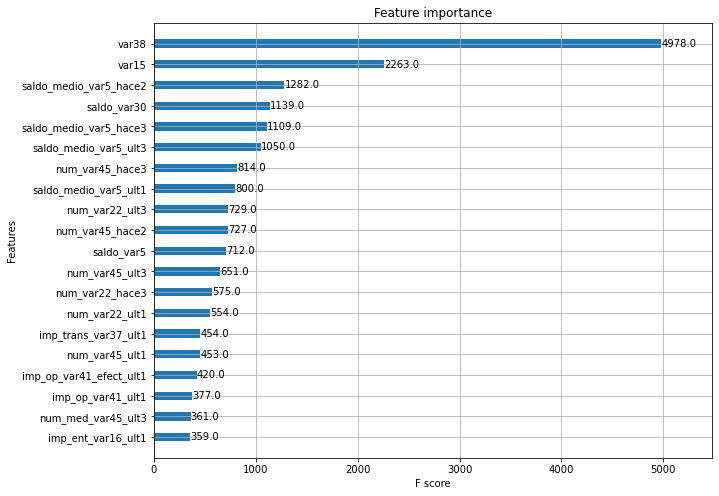

In [13]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [16]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')

print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.795963	valid_0's binary_logloss: 0.159288
[2]	valid_0's auc: 0.802591	valid_0's binary_logloss: 0.15489
[3]	valid_0's auc: 0.803101	valid_0's binary_logloss: 0.151878
[4]	valid_0's auc: 0.805022	valid_0's binary_logloss: 0.149673
[5]	valid_0's auc: 0.809511	valid_0's binary_logloss: 0.147707
[6]	valid_0's auc: 0.81027	valid_0's binary_logloss: 0.146246
[7]	valid_0's auc: 0.815418	valid_0's binary_logloss: 0.144879
[8]	valid_0's auc: 0.817089	valid_0's binary_logloss: 0.14382
[9]	valid_0's auc: 0.818182	valid_0's binary_logloss: 0.142877
[10]	valid_0's auc: 0.818933	valid_0's binary_logloss: 0.142132
[11]	valid_0's auc: 0.819397	valid_0's binary_logloss: 0.141465
[12]	valid_0's auc: 0.820659	valid_0's binary_logloss: 0.140912
[13]	valid_0's auc: 0.821707	valid_0's binary_logloss: 0.140415
[14]	valid_0's auc: 0.821327	valid_0's binary_logloss: 0.140043
[15]	valid_0's auc: 0.821794	valid_0's binary_logloss: 0.139803
[16]	valid_0's auc: 0.822535	valid_0's binary_loglos

In [17]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {
    'num_leaves': [32, 64],
    'max_depth': [128, 160],
    'min_child_samples': [60, 100],
    'subsample': [0.8, 1]
}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv를 지정하지 않습니다.
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터 : ', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))


C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.817978	valid_1's binary_logloss: 0.143581
[9]	valid_0's auc: 0.8534

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	valid_0's binary_logloss: 0.142368	valid_1's auc: 0.809445	valid_1's binary_logloss: 0.147536
[6]	valid_0's auc: 0.851777	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.815523	valid_1's binary_logloss: 0.146081
[7]	valid_0's auc: 0.853084	valid_0's binary_logloss: 0.138412	valid_1's auc: 0.815703	valid_1's binary_logloss: 0.144756
[8]	valid_0's auc: 0.85451	valid_0's binary_logloss: 0.136843	valid_1's auc: 0.818057	valid_1's binary_logloss: 0.14363
[9]	valid_0's auc: 0.855518

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826568	valid_0's binary_logloss: 0.157307	valid_1's auc: 0.798542	valid_1's binary_logloss: 0.158805
[2]	valid_0's auc: 0.832329	valid_0's binary_logloss: 0.151856	valid_1's auc: 0.801527	valid_1's binary_logloss: 0.154327
[3]	valid_0's auc: 0.838422	valid_0's binary_logloss: 0.147896	valid_1's auc: 0.806817	valid_1's binary_logloss: 0.151202
[4]	valid_0's auc: 0.845846	valid_0's binary_logloss: 0.144769	valid_1's auc: 0.817247	valid_1's binary_logloss: 0.14861
[5]	valid_0's auc: 0.849324	valid_0's binary_logloss: 0.142234	valid_1's auc: 0.820067	valid_1's binary_logloss: 0.146592
[6]	valid_0's auc: 0.850547	valid_0's binary_logloss: 0.140112	valid_1's auc: 0.818737	valid_1's binary_logloss: 0.145146
[7]	valid_0's auc: 0.853349	valid_0's binary_logloss: 0.138281	valid_1's auc: 0.821386	valid_1's binary_logloss: 0.143764
[8]	valid_0's auc: 0.855841	valid_0's binary_logloss: 0.13677	valid_1's auc: 0.822357	valid_1's binary_logloss: 0.142771
[9]	valid_0's auc: 0.85785

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.82698	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.793346	valid_1's binary_logloss: 0.15932
[2]	valid_0's auc: 0.834558	valid_0's binary_logloss: 0.1519	valid_1's auc: 0.800348	valid_1's binary_logloss: 0.154908
[3]	valid_0's auc: 0.837323	valid_0's binary_logloss: 0.147904	valid_1's auc: 0.803513	valid_1's binary_logloss: 0.151769
[4]	valid_0's auc: 0.84121	valid_0's binary_logloss: 0.144701	valid_1's auc: 0.806811	valid_1's binary_logloss: 0.149287
[5]	valid_0's auc: 0.845809	valid_0's binary_logloss: 0.142141	valid_1's auc: 0.812757	valid_1's binary_logloss: 0.147371
[6]	valid_0's auc: 0.847845	valid_0's binary_logloss: 0.140088	valid_1's auc: 0.814113	valid_1's binary_logloss: 0.145901
[7]	valid_0's auc: 0.850985	valid_0's binary_logloss: 0.138325	valid_1's auc: 0.815608	valid_1's binary_logloss: 0.144601
[8]	valid_0's auc: 0.852957	valid_0's binary_logloss: 0.136817	valid_1's auc: 0.817092	valid_1's binary_logloss: 0.14358
[9]	valid_0's auc: 0.854028	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828881	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.797399	valid_1's binary_logloss: 0.159359
[2]	valid_0's auc: 0.837469	valid_0's binary_logloss: 0.15189	valid_1's auc: 0.802516	valid_1's binary_logloss: 0.155006
[3]	valid_0's auc: 0.842051	valid_0's binary_logloss: 0.147914	valid_1's auc: 0.807272	valid_1's binary_logloss: 0.151771
[4]	valid_0's auc: 0.845212	valid_0's binary_logloss: 0.144836	valid_1's auc: 0.810277	valid_1's binary_logloss: 0.149384
[5]	valid_0's auc: 0.850439	valid_0's binary_logloss: 0.142198	valid_1's auc: 0.814093	valid_1's binary_logloss: 0.147502
[6]	valid_0's auc: 0.852254	valid_0's binary_logloss: 0.140094	valid_1's auc: 0.814639	valid_1's binary_logloss: 0.146019
[7]	valid_0's auc: 0.853913	valid_0's binary_logloss: 0.13834	valid_1's auc: 0.816636	valid_1's binary_logloss: 0.144661
[8]	valid_0's auc: 0.855048	valid_0's binary_logloss: 0.13688	valid_1's auc: 0.817545	valid_1's binary_logloss: 0.14369
[9]	valid_0's auc: 0.856809	

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.817978	valid_1's binary_logloss: 0.143581
[9]	valid_0's auc: 0.8534

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	valid_0's binary_logloss: 0.142368	valid_1's auc: 0.809445	valid_1's binary_logloss: 0.147536
[6]	valid_0's auc: 0.851777	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.815523	valid_1's binary_logloss: 0.146081
[7]	valid_0's auc: 0.853084	valid_0's binary_logloss: 0.138412	valid_1's auc: 0.815703	valid_1's binary_logloss: 0.144756
[8]	valid_0's auc: 0.85451	valid_0's binary_logloss: 0.136843	valid_1's auc: 0.818057	valid_1's binary_logloss: 0.14363
[9]	valid_0's auc: 0.855518

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826568	valid_0's binary_logloss: 0.157307	valid_1's auc: 0.798542	valid_1's binary_logloss: 0.158805
[2]	valid_0's auc: 0.832329	valid_0's binary_logloss: 0.151856	valid_1's auc: 0.801527	valid_1's binary_logloss: 0.154327
[3]	valid_0's auc: 0.838422	valid_0's binary_logloss: 0.147896	valid_1's auc: 0.806817	valid_1's binary_logloss: 0.151202
[4]	valid_0's auc: 0.845846	valid_0's binary_logloss: 0.144769	valid_1's auc: 0.817247	valid_1's binary_logloss: 0.14861
[5]	valid_0's auc: 0.849324	valid_0's binary_logloss: 0.142234	valid_1's auc: 0.820067	valid_1's binary_logloss: 0.146592
[6]	valid_0's auc: 0.850547	valid_0's binary_logloss: 0.140112	valid_1's auc: 0.818737	valid_1's binary_logloss: 0.145146
[7]	valid_0's auc: 0.853349	valid_0's binary_logloss: 0.138281	valid_1's auc: 0.821386	valid_1's binary_logloss: 0.143764
[8]	valid_0's auc: 0.855841	valid_0's binary_logloss: 0.13677	valid_1's auc: 0.822357	valid_1's binary_logloss: 0.142771
[9]	valid_0's auc: 0.85785

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.82698	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.793346	valid_1's binary_logloss: 0.15932
[2]	valid_0's auc: 0.834558	valid_0's binary_logloss: 0.1519	valid_1's auc: 0.800348	valid_1's binary_logloss: 0.154908
[3]	valid_0's auc: 0.837323	valid_0's binary_logloss: 0.147904	valid_1's auc: 0.803513	valid_1's binary_logloss: 0.151769
[4]	valid_0's auc: 0.84121	valid_0's binary_logloss: 0.144701	valid_1's auc: 0.806811	valid_1's binary_logloss: 0.149287
[5]	valid_0's auc: 0.845809	valid_0's binary_logloss: 0.142141	valid_1's auc: 0.812757	valid_1's binary_logloss: 0.147371
[6]	valid_0's auc: 0.847845	valid_0's binary_logloss: 0.140088	valid_1's auc: 0.814113	valid_1's binary_logloss: 0.145901
[7]	valid_0's auc: 0.850985	valid_0's binary_logloss: 0.138325	valid_1's auc: 0.815608	valid_1's binary_logloss: 0.144601
[8]	valid_0's auc: 0.852957	valid_0's binary_logloss: 0.136817	valid_1's auc: 0.817092	valid_1's binary_logloss: 0.14358
[9]	valid_0's auc: 0.854028	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828881	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.797399	valid_1's binary_logloss: 0.159359
[2]	valid_0's auc: 0.837469	valid_0's binary_logloss: 0.15189	valid_1's auc: 0.802516	valid_1's binary_logloss: 0.155006
[3]	valid_0's auc: 0.842051	valid_0's binary_logloss: 0.147914	valid_1's auc: 0.807272	valid_1's binary_logloss: 0.151771
[4]	valid_0's auc: 0.845212	valid_0's binary_logloss: 0.144836	valid_1's auc: 0.810277	valid_1's binary_logloss: 0.149384
[5]	valid_0's auc: 0.850439	valid_0's binary_logloss: 0.142198	valid_1's auc: 0.814093	valid_1's binary_logloss: 0.147502
[6]	valid_0's auc: 0.852254	valid_0's binary_logloss: 0.140094	valid_1's auc: 0.814639	valid_1's binary_logloss: 0.146019
[7]	valid_0's auc: 0.853913	valid_0's binary_logloss: 0.13834	valid_1's auc: 0.816636	valid_1's binary_logloss: 0.144661
[8]	valid_0's auc: 0.855048	valid_0's binary_logloss: 0.13688	valid_1's auc: 0.817545	valid_1's binary_logloss: 0.14369
[9]	valid_0's auc: 0.856809	

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.837259	valid_0's binary_logloss: 0.156538	valid_1's auc: 0.798773	valid_1's binary_logloss: 0.158999
[2]	valid_0's auc: 0.844407	valid_0's binary_logloss: 0.1505	valid_1's auc: 0.805122	valid_1's binary_logloss: 0.154547
[3]	valid_0's auc: 0.850207	valid_0's binary_logloss: 0.146115	valid_1's auc: 0.809928	valid_1's binary_logloss: 0.151137
[4]	valid_0's auc: 0.854764	valid_0's binary_logloss: 0.142775	valid_1's auc: 0.81512	valid_1's binary_logloss: 0.148713
[5]	valid_0's auc: 0.859871	valid_0's binary_logloss: 0.13992	valid_1's auc: 0.81918	valid_1's binary_logloss: 0.146851
[6]	valid_0's auc: 0.863421	valid_0's binary_logloss: 0.137591	valid_1's auc: 0.821405	valid_1's binary_logloss: 0.145224
[7]	valid_0's auc: 0.865478	valid_0's binary_logloss: 0.135594	valid_1's auc: 0.821612	valid_1's binary_logloss: 0.144027
[8]	valid_0's auc: 0.867356	valid_0's binary_logloss: 0.133895	valid_1's auc: 0.821172	valid_1's binary_logloss: 0.143113
[9]	valid_0's auc: 0.869087	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.156596	valid_1's auc: 0.790539	valid_1's binary_logloss: 0.15907
[2]	valid_0's auc: 0.840398	valid_0's binary_logloss: 0.150628	valid_1's auc: 0.804101	valid_1's binary_logloss: 0.15446
[3]	valid_0's auc: 0.849115	valid_0's binary_logloss: 0.146268	valid_1's auc: 0.805293	valid_1's binary_logloss: 0.151322
[4]	valid_0's auc: 0.857857	valid_0's binary_logloss: 0.142781	valid_1's auc: 0.812902	valid_1's binary_logloss: 0.14879
[5]	valid_0's auc: 0.862018	valid_0's binary_logloss: 0.139959	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.14698
[6]	valid_0's auc: 0.864473	valid_0's binary_logloss: 0.137534	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.145323
[7]	valid_0's auc: 0.866744	valid_0's binary_logloss: 0.135499	valid_1's auc: 0.820687	valid_1's binary_logloss: 0.143983
[8]	valid_0's auc: 0.868917	valid_0's binary_logloss: 0.133809	valid_1's auc: 0.820925	valid_1's binary_logloss: 0.142979
[9]	valid_0's auc: 0.871033	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.836973	valid_0's binary_logloss: 0.156558	valid_1's auc: 0.804921	valid_1's binary_logloss: 0.158585
[2]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.150569	valid_1's auc: 0.808966	valid_1's binary_logloss: 0.153823
[3]	valid_0's auc: 0.851798	valid_0's binary_logloss: 0.146224	valid_1's auc: 0.817038	valid_1's binary_logloss: 0.150485
[4]	valid_0's auc: 0.857243	valid_0's binary_logloss: 0.142791	valid_1's auc: 0.818046	valid_1's binary_logloss: 0.148006
[5]	valid_0's auc: 0.862295	valid_0's binary_logloss: 0.139953	valid_1's auc: 0.819257	valid_1's binary_logloss: 0.146155
[6]	valid_0's auc: 0.864122	valid_0's binary_logloss: 0.137621	valid_1's auc: 0.818955	valid_1's binary_logloss: 0.144559
[7]	valid_0's auc: 0.867409	valid_0's binary_logloss: 0.13563	valid_1's auc: 0.821142	valid_1's binary_logloss: 0.143275
[8]	valid_0's auc: 0.869064	valid_0's binary_logloss: 0.133942	valid_1's auc: 0.821832	valid_1's binary_logloss: 0.142196
[9]	valid_0's auc: 0.8712

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.799185	valid_1's binary_logloss: 0.158902
[2]	valid_0's auc: 0.846591	valid_0's binary_logloss: 0.150596	valid_1's auc: 0.804786	valid_1's binary_logloss: 0.154475
[3]	valid_0's auc: 0.849399	valid_0's binary_logloss: 0.146282	valid_1's auc: 0.805811	valid_1's binary_logloss: 0.151359
[4]	valid_0's auc: 0.854501	valid_0's binary_logloss: 0.142801	valid_1's auc: 0.811841	valid_1's binary_logloss: 0.14892
[5]	valid_0's auc: 0.860335	valid_0's binary_logloss: 0.140013	valid_1's auc: 0.815862	valid_1's binary_logloss: 0.147042
[6]	valid_0's auc: 0.862641	valid_0's binary_logloss: 0.137706	valid_1's auc: 0.815318	valid_1's binary_logloss: 0.145666
[7]	valid_0's auc: 0.866805	valid_0's binary_logloss: 0.135742	valid_1's auc: 0.818125	valid_1's binary_logloss: 0.14432
[8]	valid_0's auc: 0.868894	valid_0's binary_logloss: 0.134085	valid_1's auc: 0.81761	valid_1's binary_logloss: 0.143339
[9]	valid_0's auc: 0.870881	

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.820114	valid_1's binary_logloss: 0.143093
[9]	valid_0's auc: 0.8699

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.837259	valid_0's binary_logloss: 0.156538	valid_1's auc: 0.798773	valid_1's binary_logloss: 0.158999
[2]	valid_0's auc: 0.844407	valid_0's binary_logloss: 0.1505	valid_1's auc: 0.805122	valid_1's binary_logloss: 0.154547
[3]	valid_0's auc: 0.850207	valid_0's binary_logloss: 0.146115	valid_1's auc: 0.809928	valid_1's binary_logloss: 0.151137
[4]	valid_0's auc: 0.854764	valid_0's binary_logloss: 0.142775	valid_1's auc: 0.81512	valid_1's binary_logloss: 0.148713
[5]	valid_0's auc: 0.859871	valid_0's binary_logloss: 0.13992	valid_1's auc: 0.81918	valid_1's binary_logloss: 0.146851
[6]	valid_0's auc: 0.863421	valid_0's binary_logloss: 0.137591	valid_1's auc: 0.821405	valid_1's binary_logloss: 0.145224
[7]	valid_0's auc: 0.865478	valid_0's binary_logloss: 0.135594	valid_1's auc: 0.821612	valid_1's binary_logloss: 0.144027
[8]	valid_0's auc: 0.867356	valid_0's binary_logloss: 0.133895	valid_1's auc: 0.821172	valid_1's binary_logloss: 0.143113
[9]	valid_0's auc: 0.869087	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.156596	valid_1's auc: 0.790539	valid_1's binary_logloss: 0.15907
[2]	valid_0's auc: 0.840398	valid_0's binary_logloss: 0.150628	valid_1's auc: 0.804101	valid_1's binary_logloss: 0.15446
[3]	valid_0's auc: 0.849115	valid_0's binary_logloss: 0.146268	valid_1's auc: 0.805293	valid_1's binary_logloss: 0.151322
[4]	valid_0's auc: 0.857857	valid_0's binary_logloss: 0.142781	valid_1's auc: 0.812902	valid_1's binary_logloss: 0.14879
[5]	valid_0's auc: 0.862018	valid_0's binary_logloss: 0.139959	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.14698
[6]	valid_0's auc: 0.864473	valid_0's binary_logloss: 0.137534	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.145323
[7]	valid_0's auc: 0.866744	valid_0's binary_logloss: 0.135499	valid_1's auc: 0.820687	valid_1's binary_logloss: 0.143983
[8]	valid_0's auc: 0.868917	valid_0's binary_logloss: 0.133809	valid_1's auc: 0.820925	valid_1's binary_logloss: 0.142979
[9]	valid_0's auc: 0.871033	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.836973	valid_0's binary_logloss: 0.156558	valid_1's auc: 0.804921	valid_1's binary_logloss: 0.158585
[2]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.150569	valid_1's auc: 0.808966	valid_1's binary_logloss: 0.153823
[3]	valid_0's auc: 0.851798	valid_0's binary_logloss: 0.146224	valid_1's auc: 0.817038	valid_1's binary_logloss: 0.150485
[4]	valid_0's auc: 0.857243	valid_0's binary_logloss: 0.142791	valid_1's auc: 0.818046	valid_1's binary_logloss: 0.148006
[5]	valid_0's auc: 0.862295	valid_0's binary_logloss: 0.139953	valid_1's auc: 0.819257	valid_1's binary_logloss: 0.146155
[6]	valid_0's auc: 0.864122	valid_0's binary_logloss: 0.137621	valid_1's auc: 0.818955	valid_1's binary_logloss: 0.144559
[7]	valid_0's auc: 0.867409	valid_0's binary_logloss: 0.13563	valid_1's auc: 0.821142	valid_1's binary_logloss: 0.143275
[8]	valid_0's auc: 0.869064	valid_0's binary_logloss: 0.133942	valid_1's auc: 0.821832	valid_1's binary_logloss: 0.142196
[9]	valid_0's auc: 0.8712

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.799185	valid_1's binary_logloss: 0.158902
[2]	valid_0's auc: 0.846591	valid_0's binary_logloss: 0.150596	valid_1's auc: 0.804786	valid_1's binary_logloss: 0.154475
[3]	valid_0's auc: 0.849399	valid_0's binary_logloss: 0.146282	valid_1's auc: 0.805811	valid_1's binary_logloss: 0.151359
[4]	valid_0's auc: 0.854501	valid_0's binary_logloss: 0.142801	valid_1's auc: 0.811841	valid_1's binary_logloss: 0.14892
[5]	valid_0's auc: 0.860335	valid_0's binary_logloss: 0.140013	valid_1's auc: 0.815862	valid_1's binary_logloss: 0.147042
[6]	valid_0's auc: 0.862641	valid_0's binary_logloss: 0.137706	valid_1's auc: 0.815318	valid_1's binary_logloss: 0.145666
[7]	valid_0's auc: 0.866805	valid_0's binary_logloss: 0.135742	valid_1's auc: 0.818125	valid_1's binary_logloss: 0.14432
[8]	valid_0's auc: 0.868894	valid_0's binary_logloss: 0.134085	valid_1's auc: 0.81761	valid_1's binary_logloss: 0.143339
[9]	valid_0's auc: 0.870881	

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.820114	valid_1's binary_logloss: 0.143093
[9]	valid_0's auc: 0.8699

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.825154	valid_0's binary_logloss: 0.157511	valid_1's auc: 0.795875	valid_1's binary_logloss: 0.159213
[2]	valid_0's auc: 0.833632	valid_0's binary_logloss: 0.152101	valid_1's auc: 0.801478	valid_1's binary_logloss: 0.154832
[3]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.148155	valid_1's auc: 0.804182	valid_1's binary_logloss: 0.151829
[4]	valid_0's auc: 0.840565	valid_0's binary_logloss: 0.145049	valid_1's auc: 0.806609	valid_1's binary_logloss: 0.149469
[5]	valid_0's auc: 0.846198	valid_0's binary_logloss: 0.142498	valid_1's auc: 0.813041	valid_1's binary_logloss: 0.147555
[6]	valid_0's auc: 0.849473	valid_0's binary_logloss: 0.140396	valid_1's auc: 0.816203	valid_1's binary_logloss: 0.145877
[7]	valid_0's auc: 0.850209	valid_0's binary_logloss: 0.138654	valid_1's auc: 0.817263	valid_1's binary_logloss: 0.144575
[8]	valid_0's auc: 0.851251	valid_0's binary_logloss: 0.137213	valid_1's auc: 0.818045	valid_1's binary_logloss: 0.143505
[9]	valid_0's auc: 0.852

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.848543	valid_0's binary_logloss: 0.142591	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.147377
[6]	valid_0's auc: 0.850894	valid_0's binary_logloss: 0.140512	valid_1's auc: 0.815938	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.852272	valid_0's binary_logloss: 0.138757	valid_1's auc: 0.817141	valid_1's binary_logloss: 0.144526
[8]	valid_0's auc: 0.85338	valid_0's binary_logloss: 0.137261	valid_1's auc: 0.817326	valid_1's binary_logloss: 0.143444
[9]	valid_0's auc: 0.855643

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827062	valid_0's binary_logloss: 0.157448	valid_1's auc: 0.797806	valid_1's binary_logloss: 0.159174
[2]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.151929	valid_1's auc: 0.802902	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.808076	valid_1's binary_logloss: 0.151588
[4]	valid_0's auc: 0.844972	valid_0's binary_logloss: 0.144961	valid_1's auc: 0.811943	valid_1's binary_logloss: 0.149186
[5]	valid_0's auc: 0.849807	valid_0's binary_logloss: 0.142411	valid_1's auc: 0.815658	valid_1's binary_logloss: 0.147152
[6]	valid_0's auc: 0.852665	valid_0's binary_logloss: 0.140305	valid_1's auc: 0.819236	valid_1's binary_logloss: 0.145502
[7]	valid_0's auc: 0.85479	valid_0's binary_logloss: 0.138545	valid_1's auc: 0.820588	valid_1's binary_logloss: 0.144309
[8]	valid_0's auc: 0.856055	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.820803	valid_1's binary_logloss: 0.143182
[9]	valid_0's auc: 0.8571

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831727	valid_0's binary_logloss: 0.157565	valid_1's auc: 0.80014	valid_1's binary_logloss: 0.159252
[2]	valid_0's auc: 0.83493	valid_0's binary_logloss: 0.152121	valid_1's auc: 0.801462	valid_1's binary_logloss: 0.154971
[3]	valid_0's auc: 0.837394	valid_0's binary_logloss: 0.148128	valid_1's auc: 0.803952	valid_1's binary_logloss: 0.151796
[4]	valid_0's auc: 0.842068	valid_0's binary_logloss: 0.144995	valid_1's auc: 0.808922	valid_1's binary_logloss: 0.149367
[5]	valid_0's auc: 0.847799	valid_0's binary_logloss: 0.142476	valid_1's auc: 0.814337	valid_1's binary_logloss: 0.14736
[6]	valid_0's auc: 0.848711	valid_0's binary_logloss: 0.140413	valid_1's auc: 0.816749	valid_1's binary_logloss: 0.145697
[7]	valid_0's auc: 0.850742	valid_0's binary_logloss: 0.138701	valid_1's auc: 0.816774	valid_1's binary_logloss: 0.144523
[8]	valid_0's auc: 0.853614	valid_0's binary_logloss: 0.137156	valid_1's auc: 0.81757	valid_1's binary_logloss: 0.14348
[9]	valid_0's auc: 0.855703	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829166	valid_0's binary_logloss: 0.157516	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.159313
[2]	valid_0's auc: 0.839438	valid_0's binary_logloss: 0.152012	valid_1's auc: 0.805567	valid_1's binary_logloss: 0.154976
[3]	valid_0's auc: 0.842527	valid_0's binary_logloss: 0.148117	valid_1's auc: 0.810967	valid_1's binary_logloss: 0.151754
[4]	valid_0's auc: 0.844429	valid_0's binary_logloss: 0.14509	valid_1's auc: 0.814051	valid_1's binary_logloss: 0.149222
[5]	valid_0's auc: 0.849387	valid_0's binary_logloss: 0.142533	valid_1's auc: 0.815985	valid_1's binary_logloss: 0.147271
[6]	valid_0's auc: 0.852781	valid_0's binary_logloss: 0.140448	valid_1's auc: 0.818833	valid_1's binary_logloss: 0.145731
[7]	valid_0's auc: 0.854046	valid_0's binary_logloss: 0.138708	valid_1's auc: 0.818947	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.854765	valid_0's binary_logloss: 0.137247	valid_1's auc: 0.819123	valid_1's binary_logloss: 0.143452
[9]	valid_0's auc: 0.8553

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.825154	valid_0's binary_logloss: 0.157511	valid_1's auc: 0.795875	valid_1's binary_logloss: 0.159213
[2]	valid_0's auc: 0.833632	valid_0's binary_logloss: 0.152101	valid_1's auc: 0.801478	valid_1's binary_logloss: 0.154832
[3]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.148155	valid_1's auc: 0.804182	valid_1's binary_logloss: 0.151829
[4]	valid_0's auc: 0.840565	valid_0's binary_logloss: 0.145049	valid_1's auc: 0.806609	valid_1's binary_logloss: 0.149469
[5]	valid_0's auc: 0.846198	valid_0's binary_logloss: 0.142498	valid_1's auc: 0.813041	valid_1's binary_logloss: 0.147555
[6]	valid_0's auc: 0.849473	valid_0's binary_logloss: 0.140396	valid_1's auc: 0.816203	valid_1's binary_logloss: 0.145877
[7]	valid_0's auc: 0.850209	valid_0's binary_logloss: 0.138654	valid_1's auc: 0.817263	valid_1's binary_logloss: 0.144575
[8]	valid_0's auc: 0.851251	valid_0's binary_logloss: 0.137213	valid_1's auc: 0.818045	valid_1's binary_logloss: 0.143505
[9]	valid_0's auc: 0.852

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.848543	valid_0's binary_logloss: 0.142591	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.147377
[6]	valid_0's auc: 0.850894	valid_0's binary_logloss: 0.140512	valid_1's auc: 0.815938	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.852272	valid_0's binary_logloss: 0.138757	valid_1's auc: 0.817141	valid_1's binary_logloss: 0.144526
[8]	valid_0's auc: 0.85338	valid_0's binary_logloss: 0.137261	valid_1's auc: 0.817326	valid_1's binary_logloss: 0.143444
[9]	valid_0's auc: 0.855643

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827062	valid_0's binary_logloss: 0.157448	valid_1's auc: 0.797806	valid_1's binary_logloss: 0.159174
[2]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.151929	valid_1's auc: 0.802902	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.808076	valid_1's binary_logloss: 0.151588
[4]	valid_0's auc: 0.844972	valid_0's binary_logloss: 0.144961	valid_1's auc: 0.811943	valid_1's binary_logloss: 0.149186
[5]	valid_0's auc: 0.849807	valid_0's binary_logloss: 0.142411	valid_1's auc: 0.815658	valid_1's binary_logloss: 0.147152
[6]	valid_0's auc: 0.852665	valid_0's binary_logloss: 0.140305	valid_1's auc: 0.819236	valid_1's binary_logloss: 0.145502
[7]	valid_0's auc: 0.85479	valid_0's binary_logloss: 0.138545	valid_1's auc: 0.820588	valid_1's binary_logloss: 0.144309
[8]	valid_0's auc: 0.856055	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.820803	valid_1's binary_logloss: 0.143182
[9]	valid_0's auc: 0.8571

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831727	valid_0's binary_logloss: 0.157565	valid_1's auc: 0.80014	valid_1's binary_logloss: 0.159252
[2]	valid_0's auc: 0.83493	valid_0's binary_logloss: 0.152121	valid_1's auc: 0.801462	valid_1's binary_logloss: 0.154971
[3]	valid_0's auc: 0.837394	valid_0's binary_logloss: 0.148128	valid_1's auc: 0.803952	valid_1's binary_logloss: 0.151796
[4]	valid_0's auc: 0.842068	valid_0's binary_logloss: 0.144995	valid_1's auc: 0.808922	valid_1's binary_logloss: 0.149367
[5]	valid_0's auc: 0.847799	valid_0's binary_logloss: 0.142476	valid_1's auc: 0.814337	valid_1's binary_logloss: 0.14736
[6]	valid_0's auc: 0.848711	valid_0's binary_logloss: 0.140413	valid_1's auc: 0.816749	valid_1's binary_logloss: 0.145697
[7]	valid_0's auc: 0.850742	valid_0's binary_logloss: 0.138701	valid_1's auc: 0.816774	valid_1's binary_logloss: 0.144523
[8]	valid_0's auc: 0.853614	valid_0's binary_logloss: 0.137156	valid_1's auc: 0.81757	valid_1's binary_logloss: 0.14348
[9]	valid_0's auc: 0.855703	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829166	valid_0's binary_logloss: 0.157516	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.159313
[2]	valid_0's auc: 0.839438	valid_0's binary_logloss: 0.152012	valid_1's auc: 0.805567	valid_1's binary_logloss: 0.154976
[3]	valid_0's auc: 0.842527	valid_0's binary_logloss: 0.148117	valid_1's auc: 0.810967	valid_1's binary_logloss: 0.151754
[4]	valid_0's auc: 0.844429	valid_0's binary_logloss: 0.14509	valid_1's auc: 0.814051	valid_1's binary_logloss: 0.149222
[5]	valid_0's auc: 0.849387	valid_0's binary_logloss: 0.142533	valid_1's auc: 0.815985	valid_1's binary_logloss: 0.147271
[6]	valid_0's auc: 0.852781	valid_0's binary_logloss: 0.140448	valid_1's auc: 0.818833	valid_1's binary_logloss: 0.145731
[7]	valid_0's auc: 0.854046	valid_0's binary_logloss: 0.138708	valid_1's auc: 0.818947	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.854765	valid_0's binary_logloss: 0.137247	valid_1's auc: 0.819123	valid_1's binary_logloss: 0.143452
[9]	valid_0's auc: 0.8553

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_logloss: 0.144111
[8]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.134827	valid_1's auc: 0.821478	valid_1's binary_logloss: 0.143045
[9]	valid_0's auc: 0.866538	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	valid_1's binary_logloss: 0.143151
[9]	valid_0's auc: 0.869037	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838623	valid_0's binary_logloss: 0.156897	valid_1's auc: 0.803869	valid_1's binary_logloss: 0.158899
[2]	valid_0's auc: 0.847559	valid_0's binary_logloss: 0.151038	valid_1's auc: 0.813424	valid_1's binary_logloss: 0.154374
[3]	valid_0's auc: 0.852063	valid_0's binary_logloss: 0.146844	valid_1's auc: 0.811256	valid_1's binary_logloss: 0.151098
[4]	valid_0's auc: 0.85832	valid_0's binary_logloss: 0.143481	valid_1's auc: 0.817262	valid_1's binary_logloss: 0.14848
[5]	valid_0's auc: 0.861332	valid_0's binary_logloss: 0.140727	valid_1's auc: 0.818628	valid_1's binary_logloss: 0.14638
[6]	valid_0's auc: 0.862838	valid_0's binary_logloss: 0.138451	valid_1's auc: 0.818204	valid_1's binary_logloss: 0.14479
[7]	valid_0's auc: 0.864798	valid_0's binary_logloss: 0.136534	valid_1's auc: 0.821027	valid_1's binary_logloss: 0.143518
[8]	valid_0's auc: 0.86623	valid_0's binary_logloss: 0.13486	valid_1's auc: 0.822014	valid_1's binary_logloss: 0.142444
[9]	valid_0's auc: 0.868764	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.839722	valid_0's binary_logloss: 0.156971	valid_1's auc: 0.798273	valid_1's binary_logloss: 0.159001
[2]	valid_0's auc: 0.846106	valid_0's binary_logloss: 0.151102	valid_1's auc: 0.806378	valid_1's binary_logloss: 0.154658
[3]	valid_0's auc: 0.851603	valid_0's binary_logloss: 0.146802	valid_1's auc: 0.808815	valid_1's binary_logloss: 0.15143
[4]	valid_0's auc: 0.856899	valid_0's binary_logloss: 0.143427	valid_1's auc: 0.815423	valid_1's binary_logloss: 0.14883
[5]	valid_0's auc: 0.860628	valid_0's binary_logloss: 0.140657	valid_1's auc: 0.819314	valid_1's binary_logloss: 0.146819
[6]	valid_0's auc: 0.863592	valid_0's binary_logloss: 0.138386	valid_1's auc: 0.818091	valid_1's binary_logloss: 0.14529
[7]	valid_0's auc: 0.866094	valid_0's binary_logloss: 0.136472	valid_1's auc: 0.819663	valid_1's binary_logloss: 0.144006
[8]	valid_0's auc: 0.868319	valid_0's binary_logloss: 0.134804	valid_1's auc: 0.819774	valid_1's binary_logloss: 0.143021
[9]	valid_0's auc: 0.869683

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842706	valid_0's binary_logloss: 0.156824	valid_1's auc: 0.806363	valid_1's binary_logloss: 0.15901
[2]	valid_0's auc: 0.849573	valid_0's binary_logloss: 0.150963	valid_1's auc: 0.808979	valid_1's binary_logloss: 0.1545
[3]	valid_0's auc: 0.852339	valid_0's binary_logloss: 0.146721	valid_1's auc: 0.812761	valid_1's binary_logloss: 0.151182
[4]	valid_0's auc: 0.856319	valid_0's binary_logloss: 0.143343	valid_1's auc: 0.81482	valid_1's binary_logloss: 0.148883
[5]	valid_0's auc: 0.859446	valid_0's binary_logloss: 0.140668	valid_1's auc: 0.817207	valid_1's binary_logloss: 0.146982
[6]	valid_0's auc: 0.862561	valid_0's binary_logloss: 0.138381	valid_1's auc: 0.818624	valid_1's binary_logloss: 0.145535
[7]	valid_0's auc: 0.86502	valid_0's binary_logloss: 0.136469	valid_1's auc: 0.819366	valid_1's binary_logloss: 0.144367
[8]	valid_0's auc: 0.86697	valid_0's binary_logloss: 0.134802	valid_1's auc: 0.818629	valid_1's binary_logloss: 0.143439
[9]	valid_0's auc: 0.868077	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_logloss: 0.144111
[8]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.134827	valid_1's auc: 0.821478	valid_1's binary_logloss: 0.143045
[9]	valid_0's auc: 0.866538	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	valid_1's binary_logloss: 0.143151
[9]	valid_0's auc: 0.869037	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838623	valid_0's binary_logloss: 0.156897	valid_1's auc: 0.803869	valid_1's binary_logloss: 0.158899
[2]	valid_0's auc: 0.847559	valid_0's binary_logloss: 0.151038	valid_1's auc: 0.813424	valid_1's binary_logloss: 0.154374
[3]	valid_0's auc: 0.852063	valid_0's binary_logloss: 0.146844	valid_1's auc: 0.811256	valid_1's binary_logloss: 0.151098
[4]	valid_0's auc: 0.85832	valid_0's binary_logloss: 0.143481	valid_1's auc: 0.817262	valid_1's binary_logloss: 0.14848
[5]	valid_0's auc: 0.861332	valid_0's binary_logloss: 0.140727	valid_1's auc: 0.818628	valid_1's binary_logloss: 0.14638
[6]	valid_0's auc: 0.862838	valid_0's binary_logloss: 0.138451	valid_1's auc: 0.818204	valid_1's binary_logloss: 0.14479
[7]	valid_0's auc: 0.864798	valid_0's binary_logloss: 0.136534	valid_1's auc: 0.821027	valid_1's binary_logloss: 0.143518
[8]	valid_0's auc: 0.86623	valid_0's binary_logloss: 0.13486	valid_1's auc: 0.822014	valid_1's binary_logloss: 0.142444
[9]	valid_0's auc: 0.868764	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.839722	valid_0's binary_logloss: 0.156971	valid_1's auc: 0.798273	valid_1's binary_logloss: 0.159001
[2]	valid_0's auc: 0.846106	valid_0's binary_logloss: 0.151102	valid_1's auc: 0.806378	valid_1's binary_logloss: 0.154658
[3]	valid_0's auc: 0.851603	valid_0's binary_logloss: 0.146802	valid_1's auc: 0.808815	valid_1's binary_logloss: 0.15143
[4]	valid_0's auc: 0.856899	valid_0's binary_logloss: 0.143427	valid_1's auc: 0.815423	valid_1's binary_logloss: 0.14883
[5]	valid_0's auc: 0.860628	valid_0's binary_logloss: 0.140657	valid_1's auc: 0.819314	valid_1's binary_logloss: 0.146819
[6]	valid_0's auc: 0.863592	valid_0's binary_logloss: 0.138386	valid_1's auc: 0.818091	valid_1's binary_logloss: 0.14529
[7]	valid_0's auc: 0.866094	valid_0's binary_logloss: 0.136472	valid_1's auc: 0.819663	valid_1's binary_logloss: 0.144006
[8]	valid_0's auc: 0.868319	valid_0's binary_logloss: 0.134804	valid_1's auc: 0.819774	valid_1's binary_logloss: 0.143021
[9]	valid_0's auc: 0.869683

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842706	valid_0's binary_logloss: 0.156824	valid_1's auc: 0.806363	valid_1's binary_logloss: 0.15901
[2]	valid_0's auc: 0.849573	valid_0's binary_logloss: 0.150963	valid_1's auc: 0.808979	valid_1's binary_logloss: 0.1545
[3]	valid_0's auc: 0.852339	valid_0's binary_logloss: 0.146721	valid_1's auc: 0.812761	valid_1's binary_logloss: 0.151182
[4]	valid_0's auc: 0.856319	valid_0's binary_logloss: 0.143343	valid_1's auc: 0.81482	valid_1's binary_logloss: 0.148883
[5]	valid_0's auc: 0.859446	valid_0's binary_logloss: 0.140668	valid_1's auc: 0.817207	valid_1's binary_logloss: 0.146982
[6]	valid_0's auc: 0.862561	valid_0's binary_logloss: 0.138381	valid_1's auc: 0.818624	valid_1's binary_logloss: 0.145535
[7]	valid_0's auc: 0.86502	valid_0's binary_logloss: 0.136469	valid_1's auc: 0.819366	valid_1's binary_logloss: 0.144367
[8]	valid_0's auc: 0.86697	valid_0's binary_logloss: 0.134802	valid_1's auc: 0.818629	valid_1's binary_logloss: 0.143439
[9]	valid_0's auc: 0.868077	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.817978	valid_1's binary_logloss: 0.143581
[9]	valid_0's auc: 0.8534

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	valid_0's binary_logloss: 0.142368	valid_1's auc: 0.809445	valid_1's binary_logloss: 0.147536
[6]	valid_0's auc: 0.851777	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.815523	valid_1's binary_logloss: 0.146081
[7]	valid_0's auc: 0.853084	valid_0's binary_logloss: 0.138412	valid_1's auc: 0.815703	valid_1's binary_logloss: 0.144756
[8]	valid_0's auc: 0.85451	valid_0's binary_logloss: 0.136843	valid_1's auc: 0.818057	valid_1's binary_logloss: 0.14363
[9]	valid_0's auc: 0.855518

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826568	valid_0's binary_logloss: 0.157307	valid_1's auc: 0.798542	valid_1's binary_logloss: 0.158805
[2]	valid_0's auc: 0.832329	valid_0's binary_logloss: 0.151856	valid_1's auc: 0.801527	valid_1's binary_logloss: 0.154327
[3]	valid_0's auc: 0.838422	valid_0's binary_logloss: 0.147896	valid_1's auc: 0.806817	valid_1's binary_logloss: 0.151202
[4]	valid_0's auc: 0.845846	valid_0's binary_logloss: 0.144769	valid_1's auc: 0.817247	valid_1's binary_logloss: 0.14861
[5]	valid_0's auc: 0.849324	valid_0's binary_logloss: 0.142234	valid_1's auc: 0.820067	valid_1's binary_logloss: 0.146592
[6]	valid_0's auc: 0.850547	valid_0's binary_logloss: 0.140112	valid_1's auc: 0.818737	valid_1's binary_logloss: 0.145146
[7]	valid_0's auc: 0.853349	valid_0's binary_logloss: 0.138281	valid_1's auc: 0.821386	valid_1's binary_logloss: 0.143764
[8]	valid_0's auc: 0.855841	valid_0's binary_logloss: 0.13677	valid_1's auc: 0.822357	valid_1's binary_logloss: 0.142771
[9]	valid_0's auc: 0.85785

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.82698	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.793346	valid_1's binary_logloss: 0.15932
[2]	valid_0's auc: 0.834558	valid_0's binary_logloss: 0.1519	valid_1's auc: 0.800348	valid_1's binary_logloss: 0.154908
[3]	valid_0's auc: 0.837323	valid_0's binary_logloss: 0.147904	valid_1's auc: 0.803513	valid_1's binary_logloss: 0.151769
[4]	valid_0's auc: 0.84121	valid_0's binary_logloss: 0.144701	valid_1's auc: 0.806811	valid_1's binary_logloss: 0.149287
[5]	valid_0's auc: 0.845809	valid_0's binary_logloss: 0.142141	valid_1's auc: 0.812757	valid_1's binary_logloss: 0.147371
[6]	valid_0's auc: 0.847845	valid_0's binary_logloss: 0.140088	valid_1's auc: 0.814113	valid_1's binary_logloss: 0.145901
[7]	valid_0's auc: 0.850985	valid_0's binary_logloss: 0.138325	valid_1's auc: 0.815608	valid_1's binary_logloss: 0.144601
[8]	valid_0's auc: 0.852957	valid_0's binary_logloss: 0.136817	valid_1's auc: 0.817092	valid_1's binary_logloss: 0.14358
[9]	valid_0's auc: 0.854028	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828881	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.797399	valid_1's binary_logloss: 0.159359
[2]	valid_0's auc: 0.837469	valid_0's binary_logloss: 0.15189	valid_1's auc: 0.802516	valid_1's binary_logloss: 0.155006
[3]	valid_0's auc: 0.842051	valid_0's binary_logloss: 0.147914	valid_1's auc: 0.807272	valid_1's binary_logloss: 0.151771
[4]	valid_0's auc: 0.845212	valid_0's binary_logloss: 0.144836	valid_1's auc: 0.810277	valid_1's binary_logloss: 0.149384
[5]	valid_0's auc: 0.850439	valid_0's binary_logloss: 0.142198	valid_1's auc: 0.814093	valid_1's binary_logloss: 0.147502
[6]	valid_0's auc: 0.852254	valid_0's binary_logloss: 0.140094	valid_1's auc: 0.814639	valid_1's binary_logloss: 0.146019
[7]	valid_0's auc: 0.853913	valid_0's binary_logloss: 0.13834	valid_1's auc: 0.816636	valid_1's binary_logloss: 0.144661
[8]	valid_0's auc: 0.855048	valid_0's binary_logloss: 0.13688	valid_1's auc: 0.817545	valid_1's binary_logloss: 0.14369
[9]	valid_0's auc: 0.856809	

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824588	valid_0's binary_logloss: 0.157382	valid_1's auc: 0.795136	valid_1's binary_logloss: 0.159389
[2]	valid_0's auc: 0.832653	valid_0's binary_logloss: 0.151792	valid_1's auc: 0.801554	valid_1's binary_logloss: 0.154959
[3]	valid_0's auc: 0.838487	valid_0's binary_logloss: 0.147752	valid_1's auc: 0.804632	valid_1's binary_logloss: 0.151808
[4]	valid_0's auc: 0.84201	valid_0's binary_logloss: 0.144662	valid_1's auc: 0.807473	valid_1's binary_logloss: 0.149313
[5]	valid_0's auc: 0.847672	valid_0's binary_logloss: 0.142057	valid_1's auc: 0.814421	valid_1's binary_logloss: 0.147394
[6]	valid_0's auc: 0.849939	valid_0's binary_logloss: 0.140012	valid_1's auc: 0.816098	valid_1's binary_logloss: 0.145946
[7]	valid_0's auc: 0.851296	valid_0's binary_logloss: 0.138265	valid_1's auc: 0.817273	valid_1's binary_logloss: 0.144617
[8]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.136726	valid_1's auc: 0.817978	valid_1's binary_logloss: 0.143581
[9]	valid_0's auc: 0.8534

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826765	valid_0's binary_logloss: 0.157422	valid_1's auc: 0.794017	valid_1's binary_logloss: 0.159161
[2]	valid_0's auc: 0.833077	valid_0's binary_logloss: 0.151923	valid_1's auc: 0.798918	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.835999	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.800992	valid_1's binary_logloss: 0.151783
[4]	valid_0's auc: 0.843213	valid_0's binary_logloss: 0.14485	valid_1's auc: 0.807306	valid_1's binary_logloss: 0.149385
[5]	valid_0's auc: 0.845503	valid_0's binary_logloss: 0.142368	valid_1's auc: 0.809445	valid_1's binary_logloss: 0.147536
[6]	valid_0's auc: 0.851777	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.815523	valid_1's binary_logloss: 0.146081
[7]	valid_0's auc: 0.853084	valid_0's binary_logloss: 0.138412	valid_1's auc: 0.815703	valid_1's binary_logloss: 0.144756
[8]	valid_0's auc: 0.85451	valid_0's binary_logloss: 0.136843	valid_1's auc: 0.818057	valid_1's binary_logloss: 0.14363
[9]	valid_0's auc: 0.855518

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826568	valid_0's binary_logloss: 0.157307	valid_1's auc: 0.798542	valid_1's binary_logloss: 0.158805
[2]	valid_0's auc: 0.832329	valid_0's binary_logloss: 0.151856	valid_1's auc: 0.801527	valid_1's binary_logloss: 0.154327
[3]	valid_0's auc: 0.838422	valid_0's binary_logloss: 0.147896	valid_1's auc: 0.806817	valid_1's binary_logloss: 0.151202
[4]	valid_0's auc: 0.845846	valid_0's binary_logloss: 0.144769	valid_1's auc: 0.817247	valid_1's binary_logloss: 0.14861
[5]	valid_0's auc: 0.849324	valid_0's binary_logloss: 0.142234	valid_1's auc: 0.820067	valid_1's binary_logloss: 0.146592
[6]	valid_0's auc: 0.850547	valid_0's binary_logloss: 0.140112	valid_1's auc: 0.818737	valid_1's binary_logloss: 0.145146
[7]	valid_0's auc: 0.853349	valid_0's binary_logloss: 0.138281	valid_1's auc: 0.821386	valid_1's binary_logloss: 0.143764
[8]	valid_0's auc: 0.855841	valid_0's binary_logloss: 0.13677	valid_1's auc: 0.822357	valid_1's binary_logloss: 0.142771
[9]	valid_0's auc: 0.85785

[70]	valid_0's auc: 0.902658	valid_0's binary_logloss: 0.114936	valid_1's auc: 0.820858	valid_1's binary_logloss: 0.138912


C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.82698	valid_0's binary_logloss: 0.157364	valid_1's auc: 0.793346	valid_1's binary_logloss: 0.15932
[2]	valid_0's auc: 0.834558	valid_0's binary_logloss: 0.1519	valid_1's auc: 0.800348	valid_1's binary_logloss: 0.154908
[3]	valid_0's auc: 0.837323	valid_0's binary_logloss: 0.147904	valid_1's auc: 0.803513	valid_1's binary_logloss: 0.151769
[4]	valid_0's auc: 0.84121	valid_0's binary_logloss: 0.144701	valid_1's auc: 0.806811	valid_1's binary_logloss: 0.149287
[5]	valid_0's auc: 0.845809	valid_0's binary_logloss: 0.142141	valid_1's auc: 0.812757	valid_1's binary_logloss: 0.147371
[6]	valid_0's auc: 0.847845	valid_0's binary_logloss: 0.140088	valid_1's auc: 0.814113	valid_1's binary_logloss: 0.145901
[7]	valid_0's auc: 0.850985	valid_0's binary_logloss: 0.138325	valid_1's auc: 0.815608	valid_1's binary_logloss: 0.144601
[8]	valid_0's auc: 0.852957	valid_0's binary_logloss: 0.136817	valid_1's auc: 0.817092	valid_1's binary_logloss: 0.14358
[9]	valid_0's auc: 0.854028	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828881	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.797399	valid_1's binary_logloss: 0.159359
[2]	valid_0's auc: 0.837469	valid_0's binary_logloss: 0.15189	valid_1's auc: 0.802516	valid_1's binary_logloss: 0.155006
[3]	valid_0's auc: 0.842051	valid_0's binary_logloss: 0.147914	valid_1's auc: 0.807272	valid_1's binary_logloss: 0.151771
[4]	valid_0's auc: 0.845212	valid_0's binary_logloss: 0.144836	valid_1's auc: 0.810277	valid_1's binary_logloss: 0.149384
[5]	valid_0's auc: 0.850439	valid_0's binary_logloss: 0.142198	valid_1's auc: 0.814093	valid_1's binary_logloss: 0.147502
[6]	valid_0's auc: 0.852254	valid_0's binary_logloss: 0.140094	valid_1's auc: 0.814639	valid_1's binary_logloss: 0.146019
[7]	valid_0's auc: 0.853913	valid_0's binary_logloss: 0.13834	valid_1's auc: 0.816636	valid_1's binary_logloss: 0.144661
[8]	valid_0's auc: 0.855048	valid_0's binary_logloss: 0.13688	valid_1's auc: 0.817545	valid_1's binary_logloss: 0.14369
[9]	valid_0's auc: 0.856809	

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.837259	valid_0's binary_logloss: 0.156538	valid_1's auc: 0.798773	valid_1's binary_logloss: 0.158999
[2]	valid_0's auc: 0.844407	valid_0's binary_logloss: 0.1505	valid_1's auc: 0.805122	valid_1's binary_logloss: 0.154547
[3]	valid_0's auc: 0.850207	valid_0's binary_logloss: 0.146115	valid_1's auc: 0.809928	valid_1's binary_logloss: 0.151137
[4]	valid_0's auc: 0.854764	valid_0's binary_logloss: 0.142775	valid_1's auc: 0.81512	valid_1's binary_logloss: 0.148713
[5]	valid_0's auc: 0.859871	valid_0's binary_logloss: 0.13992	valid_1's auc: 0.81918	valid_1's binary_logloss: 0.146851
[6]	valid_0's auc: 0.863421	valid_0's binary_logloss: 0.137591	valid_1's auc: 0.821405	valid_1's binary_logloss: 0.145224
[7]	valid_0's auc: 0.865478	valid_0's binary_logloss: 0.135594	valid_1's auc: 0.821612	valid_1's binary_logloss: 0.144027
[8]	valid_0's auc: 0.867356	valid_0's binary_logloss: 0.133895	valid_1's auc: 0.821172	valid_1's binary_logloss: 0.143113
[9]	valid_0's auc: 0.869087	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.156596	valid_1's auc: 0.790539	valid_1's binary_logloss: 0.15907
[2]	valid_0's auc: 0.840398	valid_0's binary_logloss: 0.150628	valid_1's auc: 0.804101	valid_1's binary_logloss: 0.15446
[3]	valid_0's auc: 0.849115	valid_0's binary_logloss: 0.146268	valid_1's auc: 0.805293	valid_1's binary_logloss: 0.151322
[4]	valid_0's auc: 0.857857	valid_0's binary_logloss: 0.142781	valid_1's auc: 0.812902	valid_1's binary_logloss: 0.14879
[5]	valid_0's auc: 0.862018	valid_0's binary_logloss: 0.139959	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.14698
[6]	valid_0's auc: 0.864473	valid_0's binary_logloss: 0.137534	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.145323
[7]	valid_0's auc: 0.866744	valid_0's binary_logloss: 0.135499	valid_1's auc: 0.820687	valid_1's binary_logloss: 0.143983
[8]	valid_0's auc: 0.868917	valid_0's binary_logloss: 0.133809	valid_1's auc: 0.820925	valid_1's binary_logloss: 0.142979
[9]	valid_0's auc: 0.871033	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.836973	valid_0's binary_logloss: 0.156558	valid_1's auc: 0.804921	valid_1's binary_logloss: 0.158585
[2]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.150569	valid_1's auc: 0.808966	valid_1's binary_logloss: 0.153823
[3]	valid_0's auc: 0.851798	valid_0's binary_logloss: 0.146224	valid_1's auc: 0.817038	valid_1's binary_logloss: 0.150485
[4]	valid_0's auc: 0.857243	valid_0's binary_logloss: 0.142791	valid_1's auc: 0.818046	valid_1's binary_logloss: 0.148006
[5]	valid_0's auc: 0.862295	valid_0's binary_logloss: 0.139953	valid_1's auc: 0.819257	valid_1's binary_logloss: 0.146155
[6]	valid_0's auc: 0.864122	valid_0's binary_logloss: 0.137621	valid_1's auc: 0.818955	valid_1's binary_logloss: 0.144559
[7]	valid_0's auc: 0.867409	valid_0's binary_logloss: 0.13563	valid_1's auc: 0.821142	valid_1's binary_logloss: 0.143275
[8]	valid_0's auc: 0.869064	valid_0's binary_logloss: 0.133942	valid_1's auc: 0.821832	valid_1's binary_logloss: 0.142196
[9]	valid_0's auc: 0.8712

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.799185	valid_1's binary_logloss: 0.158902
[2]	valid_0's auc: 0.846591	valid_0's binary_logloss: 0.150596	valid_1's auc: 0.804786	valid_1's binary_logloss: 0.154475
[3]	valid_0's auc: 0.849399	valid_0's binary_logloss: 0.146282	valid_1's auc: 0.805811	valid_1's binary_logloss: 0.151359
[4]	valid_0's auc: 0.854501	valid_0's binary_logloss: 0.142801	valid_1's auc: 0.811841	valid_1's binary_logloss: 0.14892
[5]	valid_0's auc: 0.860335	valid_0's binary_logloss: 0.140013	valid_1's auc: 0.815862	valid_1's binary_logloss: 0.147042
[6]	valid_0's auc: 0.862641	valid_0's binary_logloss: 0.137706	valid_1's auc: 0.815318	valid_1's binary_logloss: 0.145666
[7]	valid_0's auc: 0.866805	valid_0's binary_logloss: 0.135742	valid_1's auc: 0.818125	valid_1's binary_logloss: 0.14432
[8]	valid_0's auc: 0.868894	valid_0's binary_logloss: 0.134085	valid_1's auc: 0.81761	valid_1's binary_logloss: 0.143339
[9]	valid_0's auc: 0.870881	

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.820114	valid_1's binary_logloss: 0.143093
[9]	valid_0's auc: 0.8699

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.837259	valid_0's binary_logloss: 0.156538	valid_1's auc: 0.798773	valid_1's binary_logloss: 0.158999
[2]	valid_0's auc: 0.844407	valid_0's binary_logloss: 0.1505	valid_1's auc: 0.805122	valid_1's binary_logloss: 0.154547
[3]	valid_0's auc: 0.850207	valid_0's binary_logloss: 0.146115	valid_1's auc: 0.809928	valid_1's binary_logloss: 0.151137
[4]	valid_0's auc: 0.854764	valid_0's binary_logloss: 0.142775	valid_1's auc: 0.81512	valid_1's binary_logloss: 0.148713
[5]	valid_0's auc: 0.859871	valid_0's binary_logloss: 0.13992	valid_1's auc: 0.81918	valid_1's binary_logloss: 0.146851
[6]	valid_0's auc: 0.863421	valid_0's binary_logloss: 0.137591	valid_1's auc: 0.821405	valid_1's binary_logloss: 0.145224
[7]	valid_0's auc: 0.865478	valid_0's binary_logloss: 0.135594	valid_1's auc: 0.821612	valid_1's binary_logloss: 0.144027
[8]	valid_0's auc: 0.867356	valid_0's binary_logloss: 0.133895	valid_1's auc: 0.821172	valid_1's binary_logloss: 0.143113
[9]	valid_0's auc: 0.869087	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.156596	valid_1's auc: 0.790539	valid_1's binary_logloss: 0.15907
[2]	valid_0's auc: 0.840398	valid_0's binary_logloss: 0.150628	valid_1's auc: 0.804101	valid_1's binary_logloss: 0.15446
[3]	valid_0's auc: 0.849115	valid_0's binary_logloss: 0.146268	valid_1's auc: 0.805293	valid_1's binary_logloss: 0.151322
[4]	valid_0's auc: 0.857857	valid_0's binary_logloss: 0.142781	valid_1's auc: 0.812902	valid_1's binary_logloss: 0.14879
[5]	valid_0's auc: 0.862018	valid_0's binary_logloss: 0.139959	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.14698
[6]	valid_0's auc: 0.864473	valid_0's binary_logloss: 0.137534	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.145323
[7]	valid_0's auc: 0.866744	valid_0's binary_logloss: 0.135499	valid_1's auc: 0.820687	valid_1's binary_logloss: 0.143983
[8]	valid_0's auc: 0.868917	valid_0's binary_logloss: 0.133809	valid_1's auc: 0.820925	valid_1's binary_logloss: 0.142979
[9]	valid_0's auc: 0.871033	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.836973	valid_0's binary_logloss: 0.156558	valid_1's auc: 0.804921	valid_1's binary_logloss: 0.158585
[2]	valid_0's auc: 0.843739	valid_0's binary_logloss: 0.150569	valid_1's auc: 0.808966	valid_1's binary_logloss: 0.153823
[3]	valid_0's auc: 0.851798	valid_0's binary_logloss: 0.146224	valid_1's auc: 0.817038	valid_1's binary_logloss: 0.150485
[4]	valid_0's auc: 0.857243	valid_0's binary_logloss: 0.142791	valid_1's auc: 0.818046	valid_1's binary_logloss: 0.148006
[5]	valid_0's auc: 0.862295	valid_0's binary_logloss: 0.139953	valid_1's auc: 0.819257	valid_1's binary_logloss: 0.146155
[6]	valid_0's auc: 0.864122	valid_0's binary_logloss: 0.137621	valid_1's auc: 0.818955	valid_1's binary_logloss: 0.144559
[7]	valid_0's auc: 0.867409	valid_0's binary_logloss: 0.13563	valid_1's auc: 0.821142	valid_1's binary_logloss: 0.143275
[8]	valid_0's auc: 0.869064	valid_0's binary_logloss: 0.133942	valid_1's auc: 0.821832	valid_1's binary_logloss: 0.142196
[9]	valid_0's auc: 0.8712

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.799185	valid_1's binary_logloss: 0.158902
[2]	valid_0's auc: 0.846591	valid_0's binary_logloss: 0.150596	valid_1's auc: 0.804786	valid_1's binary_logloss: 0.154475
[3]	valid_0's auc: 0.849399	valid_0's binary_logloss: 0.146282	valid_1's auc: 0.805811	valid_1's binary_logloss: 0.151359
[4]	valid_0's auc: 0.854501	valid_0's binary_logloss: 0.142801	valid_1's auc: 0.811841	valid_1's binary_logloss: 0.14892
[5]	valid_0's auc: 0.860335	valid_0's binary_logloss: 0.140013	valid_1's auc: 0.815862	valid_1's binary_logloss: 0.147042
[6]	valid_0's auc: 0.862641	valid_0's binary_logloss: 0.137706	valid_1's auc: 0.815318	valid_1's binary_logloss: 0.145666
[7]	valid_0's auc: 0.866805	valid_0's binary_logloss: 0.135742	valid_1's auc: 0.818125	valid_1's binary_logloss: 0.14432
[8]	valid_0's auc: 0.868894	valid_0's binary_logloss: 0.134085	valid_1's auc: 0.81761	valid_1's binary_logloss: 0.143339
[9]	valid_0's auc: 0.870881	

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.840866	valid_0's binary_logloss: 0.156571	valid_1's auc: 0.807773	valid_1's binary_logloss: 0.158993
[2]	valid_0's auc: 0.848981	valid_0's binary_logloss: 0.150533	valid_1's auc: 0.808864	valid_1's binary_logloss: 0.154424
[3]	valid_0's auc: 0.854015	valid_0's binary_logloss: 0.146205	valid_1's auc: 0.813612	valid_1's binary_logloss: 0.151045
[4]	valid_0's auc: 0.858396	valid_0's binary_logloss: 0.142752	valid_1's auc: 0.817297	valid_1's binary_logloss: 0.148549
[5]	valid_0's auc: 0.862105	valid_0's binary_logloss: 0.139935	valid_1's auc: 0.818986	valid_1's binary_logloss: 0.146682
[6]	valid_0's auc: 0.865475	valid_0's binary_logloss: 0.137587	valid_1's auc: 0.820048	valid_1's binary_logloss: 0.145286
[7]	valid_0's auc: 0.86721	valid_0's binary_logloss: 0.135603	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.144153
[8]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.133873	valid_1's auc: 0.820114	valid_1's binary_logloss: 0.143093
[9]	valid_0's auc: 0.8699

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.825154	valid_0's binary_logloss: 0.157511	valid_1's auc: 0.795875	valid_1's binary_logloss: 0.159213
[2]	valid_0's auc: 0.833632	valid_0's binary_logloss: 0.152101	valid_1's auc: 0.801478	valid_1's binary_logloss: 0.154832
[3]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.148155	valid_1's auc: 0.804182	valid_1's binary_logloss: 0.151829
[4]	valid_0's auc: 0.840565	valid_0's binary_logloss: 0.145049	valid_1's auc: 0.806609	valid_1's binary_logloss: 0.149469
[5]	valid_0's auc: 0.846198	valid_0's binary_logloss: 0.142498	valid_1's auc: 0.813041	valid_1's binary_logloss: 0.147555
[6]	valid_0's auc: 0.849473	valid_0's binary_logloss: 0.140396	valid_1's auc: 0.816203	valid_1's binary_logloss: 0.145877
[7]	valid_0's auc: 0.850209	valid_0's binary_logloss: 0.138654	valid_1's auc: 0.817263	valid_1's binary_logloss: 0.144575
[8]	valid_0's auc: 0.851251	valid_0's binary_logloss: 0.137213	valid_1's auc: 0.818045	valid_1's binary_logloss: 0.143505
[9]	valid_0's auc: 0.852

[71]	valid_0's auc: 0.898276	valid_0's binary_logloss: 0.116447	valid_1's auc: 0.820174	valid_1's binary_logloss: 0.139188


C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.848543	valid_0's binary_logloss: 0.142591	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.147377
[6]	valid_0's auc: 0.850894	valid_0's binary_logloss: 0.140512	valid_1's auc: 0.815938	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.852272	valid_0's binary_logloss: 0.138757	valid_1's auc: 0.817141	valid_1's binary_logloss: 0.144526
[8]	valid_0's auc: 0.85338	valid_0's binary_logloss: 0.137261	valid_1's auc: 0.817326	valid_1's binary_logloss: 0.143444
[9]	valid_0's auc: 0.855643

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827062	valid_0's binary_logloss: 0.157448	valid_1's auc: 0.797806	valid_1's binary_logloss: 0.159174
[2]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.151929	valid_1's auc: 0.802902	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.808076	valid_1's binary_logloss: 0.151588
[4]	valid_0's auc: 0.844972	valid_0's binary_logloss: 0.144961	valid_1's auc: 0.811943	valid_1's binary_logloss: 0.149186
[5]	valid_0's auc: 0.849807	valid_0's binary_logloss: 0.142411	valid_1's auc: 0.815658	valid_1's binary_logloss: 0.147152
[6]	valid_0's auc: 0.852665	valid_0's binary_logloss: 0.140305	valid_1's auc: 0.819236	valid_1's binary_logloss: 0.145502
[7]	valid_0's auc: 0.85479	valid_0's binary_logloss: 0.138545	valid_1's auc: 0.820588	valid_1's binary_logloss: 0.144309
[8]	valid_0's auc: 0.856055	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.820803	valid_1's binary_logloss: 0.143182
[9]	valid_0's auc: 0.8571

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831727	valid_0's binary_logloss: 0.157565	valid_1's auc: 0.80014	valid_1's binary_logloss: 0.159252
[2]	valid_0's auc: 0.83493	valid_0's binary_logloss: 0.152121	valid_1's auc: 0.801462	valid_1's binary_logloss: 0.154971
[3]	valid_0's auc: 0.837394	valid_0's binary_logloss: 0.148128	valid_1's auc: 0.803952	valid_1's binary_logloss: 0.151796
[4]	valid_0's auc: 0.842068	valid_0's binary_logloss: 0.144995	valid_1's auc: 0.808922	valid_1's binary_logloss: 0.149367
[5]	valid_0's auc: 0.847799	valid_0's binary_logloss: 0.142476	valid_1's auc: 0.814337	valid_1's binary_logloss: 0.14736
[6]	valid_0's auc: 0.848711	valid_0's binary_logloss: 0.140413	valid_1's auc: 0.816749	valid_1's binary_logloss: 0.145697
[7]	valid_0's auc: 0.850742	valid_0's binary_logloss: 0.138701	valid_1's auc: 0.816774	valid_1's binary_logloss: 0.144523
[8]	valid_0's auc: 0.853614	valid_0's binary_logloss: 0.137156	valid_1's auc: 0.81757	valid_1's binary_logloss: 0.14348
[9]	valid_0's auc: 0.855703	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829166	valid_0's binary_logloss: 0.157516	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.159313
[2]	valid_0's auc: 0.839438	valid_0's binary_logloss: 0.152012	valid_1's auc: 0.805567	valid_1's binary_logloss: 0.154976
[3]	valid_0's auc: 0.842527	valid_0's binary_logloss: 0.148117	valid_1's auc: 0.810967	valid_1's binary_logloss: 0.151754
[4]	valid_0's auc: 0.844429	valid_0's binary_logloss: 0.14509	valid_1's auc: 0.814051	valid_1's binary_logloss: 0.149222
[5]	valid_0's auc: 0.849387	valid_0's binary_logloss: 0.142533	valid_1's auc: 0.815985	valid_1's binary_logloss: 0.147271
[6]	valid_0's auc: 0.852781	valid_0's binary_logloss: 0.140448	valid_1's auc: 0.818833	valid_1's binary_logloss: 0.145731
[7]	valid_0's auc: 0.854046	valid_0's binary_logloss: 0.138708	valid_1's auc: 0.818947	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.854765	valid_0's binary_logloss: 0.137247	valid_1's auc: 0.819123	valid_1's binary_logloss: 0.143452
[9]	valid_0's auc: 0.8553

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.825154	valid_0's binary_logloss: 0.157511	valid_1's auc: 0.795875	valid_1's binary_logloss: 0.159213
[2]	valid_0's auc: 0.833632	valid_0's binary_logloss: 0.152101	valid_1's auc: 0.801478	valid_1's binary_logloss: 0.154832
[3]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.148155	valid_1's auc: 0.804182	valid_1's binary_logloss: 0.151829
[4]	valid_0's auc: 0.840565	valid_0's binary_logloss: 0.145049	valid_1's auc: 0.806609	valid_1's binary_logloss: 0.149469
[5]	valid_0's auc: 0.846198	valid_0's binary_logloss: 0.142498	valid_1's auc: 0.813041	valid_1's binary_logloss: 0.147555
[6]	valid_0's auc: 0.849473	valid_0's binary_logloss: 0.140396	valid_1's auc: 0.816203	valid_1's binary_logloss: 0.145877
[7]	valid_0's auc: 0.850209	valid_0's binary_logloss: 0.138654	valid_1's auc: 0.817263	valid_1's binary_logloss: 0.144575
[8]	valid_0's auc: 0.851251	valid_0's binary_logloss: 0.137213	valid_1's auc: 0.818045	valid_1's binary_logloss: 0.143505
[9]	valid_0's auc: 0.852

[70]	valid_0's auc: 0.898011	valid_0's binary_logloss: 0.116567	valid_1's auc: 0.820444	valid_1's binary_logloss: 0.139124
[71]	valid_0's auc: 0.898276	valid_0's binary_logloss: 0.116447	valid_1's auc: 0.820174	valid_1's binary_logloss: 0.139188


C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827581	valid_0's binary_logloss: 0.157435	valid_1's auc: 0.795649	valid_1's binary_logloss: 0.15916
[2]	valid_0's auc: 0.832805	valid_0's binary_logloss: 0.152037	valid_1's auc: 0.801036	valid_1's binary_logloss: 0.154657
[3]	valid_0's auc: 0.835525	valid_0's binary_logloss: 0.148235	valid_1's auc: 0.802027	valid_1's binary_logloss: 0.151663
[4]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.145188	valid_1's auc: 0.808216	valid_1's binary_logloss: 0.14931
[5]	valid_0's auc: 0.848543	valid_0's binary_logloss: 0.142591	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.147377
[6]	valid_0's auc: 0.850894	valid_0's binary_logloss: 0.140512	valid_1's auc: 0.815938	valid_1's binary_logloss: 0.145838
[7]	valid_0's auc: 0.852272	valid_0's binary_logloss: 0.138757	valid_1's auc: 0.817141	valid_1's binary_logloss: 0.144526
[8]	valid_0's auc: 0.85338	valid_0's binary_logloss: 0.137261	valid_1's auc: 0.817326	valid_1's binary_logloss: 0.143444
[9]	valid_0's auc: 0.855643

[69]	valid_0's auc: 0.899122	valid_0's binary_logloss: 0.116582	valid_1's auc: 0.818942	valid_1's binary_logloss: 0.13934
[70]	valid_0's auc: 0.899393	valid_0's binary_logloss: 0.116431	valid_1's auc: 0.818775	valid_1's binary_logloss: 0.139419


C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827062	valid_0's binary_logloss: 0.157448	valid_1's auc: 0.797806	valid_1's binary_logloss: 0.159174
[2]	valid_0's auc: 0.834527	valid_0's binary_logloss: 0.151929	valid_1's auc: 0.802902	valid_1's binary_logloss: 0.154784
[3]	valid_0's auc: 0.840635	valid_0's binary_logloss: 0.147996	valid_1's auc: 0.808076	valid_1's binary_logloss: 0.151588
[4]	valid_0's auc: 0.844972	valid_0's binary_logloss: 0.144961	valid_1's auc: 0.811943	valid_1's binary_logloss: 0.149186
[5]	valid_0's auc: 0.849807	valid_0's binary_logloss: 0.142411	valid_1's auc: 0.815658	valid_1's binary_logloss: 0.147152
[6]	valid_0's auc: 0.852665	valid_0's binary_logloss: 0.140305	valid_1's auc: 0.819236	valid_1's binary_logloss: 0.145502
[7]	valid_0's auc: 0.85479	valid_0's binary_logloss: 0.138545	valid_1's auc: 0.820588	valid_1's binary_logloss: 0.144309
[8]	valid_0's auc: 0.856055	valid_0's binary_logloss: 0.137076	valid_1's auc: 0.820803	valid_1's binary_logloss: 0.143182
[9]	valid_0's auc: 0.8571

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831727	valid_0's binary_logloss: 0.157565	valid_1's auc: 0.80014	valid_1's binary_logloss: 0.159252
[2]	valid_0's auc: 0.83493	valid_0's binary_logloss: 0.152121	valid_1's auc: 0.801462	valid_1's binary_logloss: 0.154971
[3]	valid_0's auc: 0.837394	valid_0's binary_logloss: 0.148128	valid_1's auc: 0.803952	valid_1's binary_logloss: 0.151796
[4]	valid_0's auc: 0.842068	valid_0's binary_logloss: 0.144995	valid_1's auc: 0.808922	valid_1's binary_logloss: 0.149367
[5]	valid_0's auc: 0.847799	valid_0's binary_logloss: 0.142476	valid_1's auc: 0.814337	valid_1's binary_logloss: 0.14736
[6]	valid_0's auc: 0.848711	valid_0's binary_logloss: 0.140413	valid_1's auc: 0.816749	valid_1's binary_logloss: 0.145697
[7]	valid_0's auc: 0.850742	valid_0's binary_logloss: 0.138701	valid_1's auc: 0.816774	valid_1's binary_logloss: 0.144523
[8]	valid_0's auc: 0.853614	valid_0's binary_logloss: 0.137156	valid_1's auc: 0.81757	valid_1's binary_logloss: 0.14348
[9]	valid_0's auc: 0.855703	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829166	valid_0's binary_logloss: 0.157516	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.159313
[2]	valid_0's auc: 0.839438	valid_0's binary_logloss: 0.152012	valid_1's auc: 0.805567	valid_1's binary_logloss: 0.154976
[3]	valid_0's auc: 0.842527	valid_0's binary_logloss: 0.148117	valid_1's auc: 0.810967	valid_1's binary_logloss: 0.151754
[4]	valid_0's auc: 0.844429	valid_0's binary_logloss: 0.14509	valid_1's auc: 0.814051	valid_1's binary_logloss: 0.149222
[5]	valid_0's auc: 0.849387	valid_0's binary_logloss: 0.142533	valid_1's auc: 0.815985	valid_1's binary_logloss: 0.147271
[6]	valid_0's auc: 0.852781	valid_0's binary_logloss: 0.140448	valid_1's auc: 0.818833	valid_1's binary_logloss: 0.145731
[7]	valid_0's auc: 0.854046	valid_0's binary_logloss: 0.138708	valid_1's auc: 0.818947	valid_1's binary_logloss: 0.144452
[8]	valid_0's auc: 0.854765	valid_0's binary_logloss: 0.137247	valid_1's auc: 0.819123	valid_1's binary_logloss: 0.143452
[9]	valid_0's auc: 0.8553

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_logloss: 0.144111
[8]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.134827	valid_1's auc: 0.821478	valid_1's binary_logloss: 0.143045
[9]	valid_0's auc: 0.866538	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	valid_1's binary_logloss: 0.143151
[9]	valid_0's auc: 0.869037	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838623	valid_0's binary_logloss: 0.156897	valid_1's auc: 0.803869	valid_1's binary_logloss: 0.158899
[2]	valid_0's auc: 0.847559	valid_0's binary_logloss: 0.151038	valid_1's auc: 0.813424	valid_1's binary_logloss: 0.154374
[3]	valid_0's auc: 0.852063	valid_0's binary_logloss: 0.146844	valid_1's auc: 0.811256	valid_1's binary_logloss: 0.151098
[4]	valid_0's auc: 0.85832	valid_0's binary_logloss: 0.143481	valid_1's auc: 0.817262	valid_1's binary_logloss: 0.14848
[5]	valid_0's auc: 0.861332	valid_0's binary_logloss: 0.140727	valid_1's auc: 0.818628	valid_1's binary_logloss: 0.14638
[6]	valid_0's auc: 0.862838	valid_0's binary_logloss: 0.138451	valid_1's auc: 0.818204	valid_1's binary_logloss: 0.14479
[7]	valid_0's auc: 0.864798	valid_0's binary_logloss: 0.136534	valid_1's auc: 0.821027	valid_1's binary_logloss: 0.143518
[8]	valid_0's auc: 0.86623	valid_0's binary_logloss: 0.13486	valid_1's auc: 0.822014	valid_1's binary_logloss: 0.142444
[9]	valid_0's auc: 0.868764	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.839722	valid_0's binary_logloss: 0.156971	valid_1's auc: 0.798273	valid_1's binary_logloss: 0.159001
[2]	valid_0's auc: 0.846106	valid_0's binary_logloss: 0.151102	valid_1's auc: 0.806378	valid_1's binary_logloss: 0.154658
[3]	valid_0's auc: 0.851603	valid_0's binary_logloss: 0.146802	valid_1's auc: 0.808815	valid_1's binary_logloss: 0.15143
[4]	valid_0's auc: 0.856899	valid_0's binary_logloss: 0.143427	valid_1's auc: 0.815423	valid_1's binary_logloss: 0.14883
[5]	valid_0's auc: 0.860628	valid_0's binary_logloss: 0.140657	valid_1's auc: 0.819314	valid_1's binary_logloss: 0.146819
[6]	valid_0's auc: 0.863592	valid_0's binary_logloss: 0.138386	valid_1's auc: 0.818091	valid_1's binary_logloss: 0.14529
[7]	valid_0's auc: 0.866094	valid_0's binary_logloss: 0.136472	valid_1's auc: 0.819663	valid_1's binary_logloss: 0.144006
[8]	valid_0's auc: 0.868319	valid_0's binary_logloss: 0.134804	valid_1's auc: 0.819774	valid_1's binary_logloss: 0.143021
[9]	valid_0's auc: 0.869683

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842706	valid_0's binary_logloss: 0.156824	valid_1's auc: 0.806363	valid_1's binary_logloss: 0.15901
[2]	valid_0's auc: 0.849573	valid_0's binary_logloss: 0.150963	valid_1's auc: 0.808979	valid_1's binary_logloss: 0.1545
[3]	valid_0's auc: 0.852339	valid_0's binary_logloss: 0.146721	valid_1's auc: 0.812761	valid_1's binary_logloss: 0.151182
[4]	valid_0's auc: 0.856319	valid_0's binary_logloss: 0.143343	valid_1's auc: 0.81482	valid_1's binary_logloss: 0.148883
[5]	valid_0's auc: 0.859446	valid_0's binary_logloss: 0.140668	valid_1's auc: 0.817207	valid_1's binary_logloss: 0.146982
[6]	valid_0's auc: 0.862561	valid_0's binary_logloss: 0.138381	valid_1's auc: 0.818624	valid_1's binary_logloss: 0.145535
[7]	valid_0's auc: 0.86502	valid_0's binary_logloss: 0.136469	valid_1's auc: 0.819366	valid_1's binary_logloss: 0.144367
[8]	valid_0's auc: 0.86697	valid_0's binary_logloss: 0.134802	valid_1's auc: 0.818629	valid_1's binary_logloss: 0.143439
[9]	valid_0's auc: 0.868077	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838506	valid_0's binary_logloss: 0.156904	valid_1's auc: 0.801316	valid_1's binary_logloss: 0.158905
[2]	valid_0's auc: 0.84484	valid_0's binary_logloss: 0.151115	valid_1's auc: 0.808486	valid_1's binary_logloss: 0.154558
[3]	valid_0's auc: 0.853282	valid_0's binary_logloss: 0.146836	valid_1's auc: 0.814997	valid_1's binary_logloss: 0.151344
[4]	valid_0's auc: 0.85606	valid_0's binary_logloss: 0.143583	valid_1's auc: 0.814777	valid_1's binary_logloss: 0.14893
[5]	valid_0's auc: 0.860078	valid_0's binary_logloss: 0.1408	valid_1's auc: 0.818693	valid_1's binary_logloss: 0.146942
[6]	valid_0's auc: 0.861882	valid_0's binary_logloss: 0.138431	valid_1's auc: 0.820392	valid_1's binary_logloss: 0.145297
[7]	valid_0's auc: 0.863732	valid_0's binary_logloss: 0.136477	valid_1's auc: 0.820628	valid_1's binary_logloss: 0.144111
[8]	valid_0's auc: 0.865462	valid_0's binary_logloss: 0.134827	valid_1's auc: 0.821478	valid_1's binary_logloss: 0.143045
[9]	valid_0's auc: 0.866538	v

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842065	valid_0's binary_logloss: 0.156809	valid_1's auc: 0.802278	valid_1's binary_logloss: 0.15881
[2]	valid_0's auc: 0.84744	valid_0's binary_logloss: 0.150975	valid_1's auc: 0.807023	valid_1's binary_logloss: 0.154311
[3]	valid_0's auc: 0.853685	valid_0's binary_logloss: 0.146819	valid_1's auc: 0.807977	valid_1's binary_logloss: 0.1513
[4]	valid_0's auc: 0.859466	valid_0's binary_logloss: 0.143541	valid_1's auc: 0.811436	valid_1's binary_logloss: 0.148918
[5]	valid_0's auc: 0.862248	valid_0's binary_logloss: 0.140813	valid_1's auc: 0.813282	valid_1's binary_logloss: 0.147002
[6]	valid_0's auc: 0.86439	valid_0's binary_logloss: 0.138462	valid_1's auc: 0.815842	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.865821	valid_0's binary_logloss: 0.136518	valid_1's auc: 0.81598	valid_1's binary_logloss: 0.144175
[8]	valid_0's auc: 0.867488	valid_0's binary_logloss: 0.134853	valid_1's auc: 0.818316	valid_1's binary_logloss: 0.143151
[9]	valid_0's auc: 0.869037	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.838623	valid_0's binary_logloss: 0.156897	valid_1's auc: 0.803869	valid_1's binary_logloss: 0.158899
[2]	valid_0's auc: 0.847559	valid_0's binary_logloss: 0.151038	valid_1's auc: 0.813424	valid_1's binary_logloss: 0.154374
[3]	valid_0's auc: 0.852063	valid_0's binary_logloss: 0.146844	valid_1's auc: 0.811256	valid_1's binary_logloss: 0.151098
[4]	valid_0's auc: 0.85832	valid_0's binary_logloss: 0.143481	valid_1's auc: 0.817262	valid_1's binary_logloss: 0.14848
[5]	valid_0's auc: 0.861332	valid_0's binary_logloss: 0.140727	valid_1's auc: 0.818628	valid_1's binary_logloss: 0.14638
[6]	valid_0's auc: 0.862838	valid_0's binary_logloss: 0.138451	valid_1's auc: 0.818204	valid_1's binary_logloss: 0.14479
[7]	valid_0's auc: 0.864798	valid_0's binary_logloss: 0.136534	valid_1's auc: 0.821027	valid_1's binary_logloss: 0.143518
[8]	valid_0's auc: 0.86623	valid_0's binary_logloss: 0.13486	valid_1's auc: 0.822014	valid_1's binary_logloss: 0.142444
[9]	valid_0's auc: 0.868764	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.839722	valid_0's binary_logloss: 0.156971	valid_1's auc: 0.798273	valid_1's binary_logloss: 0.159001
[2]	valid_0's auc: 0.846106	valid_0's binary_logloss: 0.151102	valid_1's auc: 0.806378	valid_1's binary_logloss: 0.154658
[3]	valid_0's auc: 0.851603	valid_0's binary_logloss: 0.146802	valid_1's auc: 0.808815	valid_1's binary_logloss: 0.15143
[4]	valid_0's auc: 0.856899	valid_0's binary_logloss: 0.143427	valid_1's auc: 0.815423	valid_1's binary_logloss: 0.14883
[5]	valid_0's auc: 0.860628	valid_0's binary_logloss: 0.140657	valid_1's auc: 0.819314	valid_1's binary_logloss: 0.146819
[6]	valid_0's auc: 0.863592	valid_0's binary_logloss: 0.138386	valid_1's auc: 0.818091	valid_1's binary_logloss: 0.14529
[7]	valid_0's auc: 0.866094	valid_0's binary_logloss: 0.136472	valid_1's auc: 0.819663	valid_1's binary_logloss: 0.144006
[8]	valid_0's auc: 0.868319	valid_0's binary_logloss: 0.134804	valid_1's auc: 0.819774	valid_1's binary_logloss: 0.143021
[9]	valid_0's auc: 0.869683

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.842706	valid_0's binary_logloss: 0.156824	valid_1's auc: 0.806363	valid_1's binary_logloss: 0.15901
[2]	valid_0's auc: 0.849573	valid_0's binary_logloss: 0.150963	valid_1's auc: 0.808979	valid_1's binary_logloss: 0.1545
[3]	valid_0's auc: 0.852339	valid_0's binary_logloss: 0.146721	valid_1's auc: 0.812761	valid_1's binary_logloss: 0.151182
[4]	valid_0's auc: 0.856319	valid_0's binary_logloss: 0.143343	valid_1's auc: 0.81482	valid_1's binary_logloss: 0.148883
[5]	valid_0's auc: 0.859446	valid_0's binary_logloss: 0.140668	valid_1's auc: 0.817207	valid_1's binary_logloss: 0.146982
[6]	valid_0's auc: 0.862561	valid_0's binary_logloss: 0.138381	valid_1's auc: 0.818624	valid_1's binary_logloss: 0.145535
[7]	valid_0's auc: 0.86502	valid_0's binary_logloss: 0.136469	valid_1's auc: 0.819366	valid_1's binary_logloss: 0.144367
[8]	valid_0's auc: 0.86697	valid_0's binary_logloss: 0.134802	valid_1's auc: 0.818629	valid_1's binary_logloss: 0.143439
[9]	valid_0's auc: 0.868077	va

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.828812	training's binary_logloss: 0.157418	valid_1's auc: 0.796283	valid_1's binary_logloss: 0.159424
[2]	training's auc: 0.837744	training's binary_logloss: 0.151879	valid_1's auc: 0.803289	valid_1's binary_logloss: 0.154921
[3]	training's auc: 0.84174	training's binary_logloss: 0.147881	valid_1's auc: 0.807301	valid_1's binary_logloss: 0.1518
[4]	training's auc: 0.846214	training's binary_logloss: 0.144859	valid_1's auc: 0.811102	valid_1's binary_logloss: 0.149384
[5]	training's auc: 0.851186	training's binary_logloss: 0.14225	valid_1's auc: 0.817613	valid_1's binary_logloss: 0.147338
[6]	training's auc: 0.853336	training's binary_logloss: 0.140122	valid_1's auc: 0.819807	valid_1's binary_logloss: 0.145735
[7]	training's auc: 0.854847	training's binary_logloss: 0.138357	valid_1's auc: 0.820399	valid_1's binary_logloss: 0.1445
[8]	training's auc: 0.855799	training's binary_logloss: 0.136862	valid_1's auc: 0.820003	valid_1's binary_logloss: 0.143404
[9]	training's

In [19]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=100, max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')

print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.796283	valid_0's binary_logloss: 0.159424
[2]	valid_0's auc: 0.803289	valid_0's binary_logloss: 0.154921
[3]	valid_0's auc: 0.807301	valid_0's binary_logloss: 0.1518
[4]	valid_0's auc: 0.811102	valid_0's binary_logloss: 0.149384
[5]	valid_0's auc: 0.817613	valid_0's binary_logloss: 0.147338
[6]	valid_0's auc: 0.819807	valid_0's binary_logloss: 0.145735
[7]	valid_0's auc: 0.820399	valid_0's binary_logloss: 0.1445
[8]	valid_0's auc: 0.820003	valid_0's binary_logloss: 0.143404
[9]	valid_0's auc: 0.821257	valid_0's binary_logloss: 0.142464
[10]	valid_0's auc: 0.820964	valid_0's binary_logloss: 0.141718
[11]	valid_0's auc: 0.821671	valid_0's binary_logloss: 0.14109
[12]	valid_0's auc: 0.822687	valid_0's binary_logloss: 0.140595
[13]	valid_0's auc: 0.822748	valid_0's binary_logloss: 0.140177
[14]	valid_0's auc: 0.823109	valid_0's binary_logloss: 0.139739
[15]	valid_0's auc: 0.822756	valid_0's binary_logloss: 0.139486
[16]	valid_0's auc: 0.822894	valid_0's binary_logloss:

[130]	valid_0's auc: 0.815664	valid_0's binary_logloss: 0.140399
[131]	valid_0's auc: 0.815452	valid_0's binary_logloss: 0.140453
ROC AUC : 0.8259
